In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [30]:
#cargamos dataset y convertimos a string las variables que son IDs
df = pd.read_csv('Copia de Bologna_Italia.csv')
df = df.drop(df.columns[0], axis=1)
df[df.columns[0]] = df[df.columns[0]].astype(str) 
df[df.columns[1]] = df[df.columns[1]].astype(str)
df[df.columns[4]] = df[df.columns[4]].astype(str)
df.head()

,id,scrape_id,last_scraped,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,46352,20241200000000.0,20/12/24,city scrape,467810,28/03/11,within a day,75%,47%,f,...,4.85,4.84,4.68,NaN,f,2,0,2,0,2.60
1,59697,20241200000000.0,20/12/24,city scrape,286688,14/11/10,within a day,50%,50%,f,...,4.79,4.82,4.66,NaN,f,2,0,2,0,1.64
2,85368,20241200000000.0,20/12/24,city scrape,467675,28/03/11,within an hour,86%,73%,t,...,4.98,4.80,4.82,IT037006C2QKQSH3S7,f,1,1,0,0,0.40
3,219878,20241200000000.0,20/12/24,city scrape,1139326,10/09/11,within an hour,100%,95%,t,...,4.92,4.83,4.78,IT037006C2HQERHOGR,f,2,2,0,0,1.10
4,229114,20241200000000.0,20/12/24,city scrape,1196205,22/09/11,within an hour,100%,100%,t,...,4.95,4.51,4.74,IT037006C2KRRTWGRT,t,1,1,0,0,0.58


In [31]:
# creo una función para sustituir valores nulos del df
def sustitucion_nulos(df):

    columnas = np.arange(len(df.columns))
    pares = df.iloc[:,columnas%2==0]
    impares = df.iloc[:,columnas%2!=0]

    cuantitativas_pares = pares.select_dtypes(include=['float64', 'int64','float','int'])
    cuantitativas_impares = impares.select_dtypes(include=['float64', 'int64','float','int'])

    cuantitativas_pares = cuantitativas_pares.fillna(cuantitativas_pares.mean().round(1))
    cuantitativas_impares = cuantitativas_impares.fillna(99)

    cualitativas_pares = pares.select_dtypes(include=['object', 'datetime','category'])
    cualitativas_impares = impares.select_dtypes(include=['object', 'datetime','category'])
        
    cualitativas_pares = cualitativas_pares.fillna('Este_es_un_valor_nulo')
    cualitativas_impares = cualitativas_pares.fillna('Este_es_un_valor_nulo')


    df = pd.concat([cuantitativas_impares,cuantitativas_pares,cualitativas_impares,cualitativas_pares],axis=1)

    return(df)

In [32]:
# función creada para sustituir valores atípicos con el método de rango intercuantílico
def sustituir_atipicos(df):  
    
    cualitativas = df.select_dtypes(include=['object', 'datetime','category'])
    cuantitativas = df.select_dtypes(include=['float64', 'int64','float','int'])

    y = cuantitativas

    percentile25 = y.quantile(0.25)#Q1
    percentile75 = y.quantile(0.75)#Q3
    iqr = percentile75-percentile25

    limite_superior_iqr = percentile75+1.5*iqr
    limite_inferior_iqr = percentile25-1.5*iqr

    df_iqr = cuantitativas[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
    df_final_iqr = df_iqr.fillna(round(df_iqr.mean(),1))
    return(pd.concat([cualitativas,df_final_iqr],axis=1))

In [33]:
df = sustitucion_nulos(df)
df = sustituir_atipicos(df)

In [34]:
nulos = df.isnull().sum()
nulos

id                                              0
last_scraped                                    0
host_id                                         0
host_response_time                              0
host_acceptance_rate                            0
host_identity_verified                          0
property_type                                   0
bathrooms_text                                  0
price                                           0
first_review                                    0
instant_bookable                                0
id                                              0
last_scraped                                    0
host_id                                         0
host_response_time                              0
host_acceptance_rate                            0
host_identity_verified                          0
property_type                                   0
bathrooms_text                                  0
price                                           0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4668 non-null   object 
 1   last_scraped                                  4668 non-null   object 
 2   host_id                                       4668 non-null   object 
 3   host_response_time                            4668 non-null   object 
 4   host_acceptance_rate                          4668 non-null   object 
 5   host_identity_verified                        4668 non-null   object 
 6   property_type                                 4668 non-null   object 
 7   bathrooms_text                                4668 non-null   object 
 8   price                                         4668 non-null   object 
 9   first_review                                  4668 non-null   o

In [36]:
df = df.loc[:, ~df.columns.duplicated()]


In [37]:
freq_tbl(df)


                       id  frequency  percentage  cumulative_perc
0                   46352          1    0.000214         0.000214
1      918567563002784538          1    0.000214         0.000428
2      910025228476268998          1    0.000214         0.000643
3      909886124312539459          1    0.000214         0.000857
4      909332753582282569          1    0.000214         0.001071
...                   ...        ...         ...              ...
4663             42395074          1    0.000214         0.999143
4664             42380441          1    0.000214         0.999357
4665             42377715          1    0.000214         0.999572
4666             42373636          1    0.000214         0.999786
4667  1313998882024110468          1    0.000214         1.000000

[4668 rows x 4 columns]

----------------------------------------------------------------

  last_scraped  frequency  percentage  cumulative_perc
0     20/12/24       4668         1.0              1.0

-----


Tabla de frecuencias para host_response_time:
      host_response_time  frequency  percentage  cumulative_perc
0         within an hour       3507    0.751285         0.751285
1  Este_es_un_valor_nulo        470    0.100686         0.851971
2     within a few hours        343    0.073479         0.925450
3           within a day        223    0.047772         0.973222
4     a few days or more        125    0.026778         1.000000


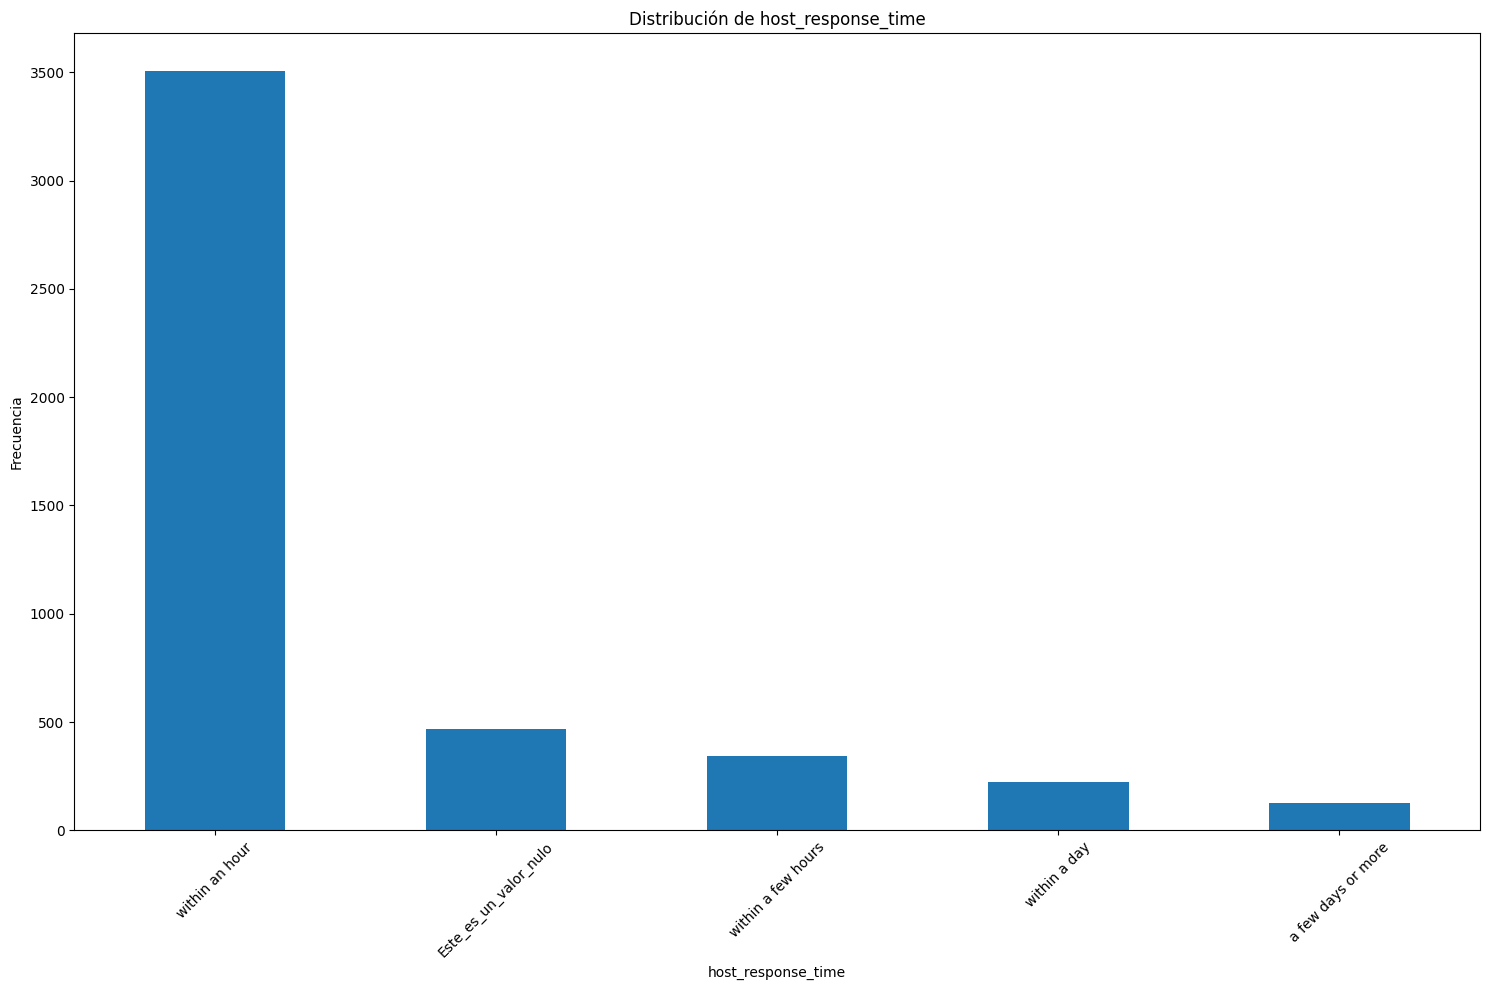


Tabla de frecuencias para host_id:
        host_id  frequency  percentage  cumulative_perc
0     487811050        168    0.035990         0.035990
1     228384114         97    0.020780         0.056769
2     132464778         74    0.015853         0.072622
3      12182373         58    0.012425         0.085047
4      39681587         56    0.011997         0.097044
...         ...        ...         ...              ...
2361   55003158          1    0.000214         0.999143
2362  336014337          1    0.000214         0.999357
2363  134806801          1    0.000214         0.999572
2364  335317034          1    0.000214         0.999786
2365  596415411          1    0.000214         1.000000

[2366 rows x 4 columns]


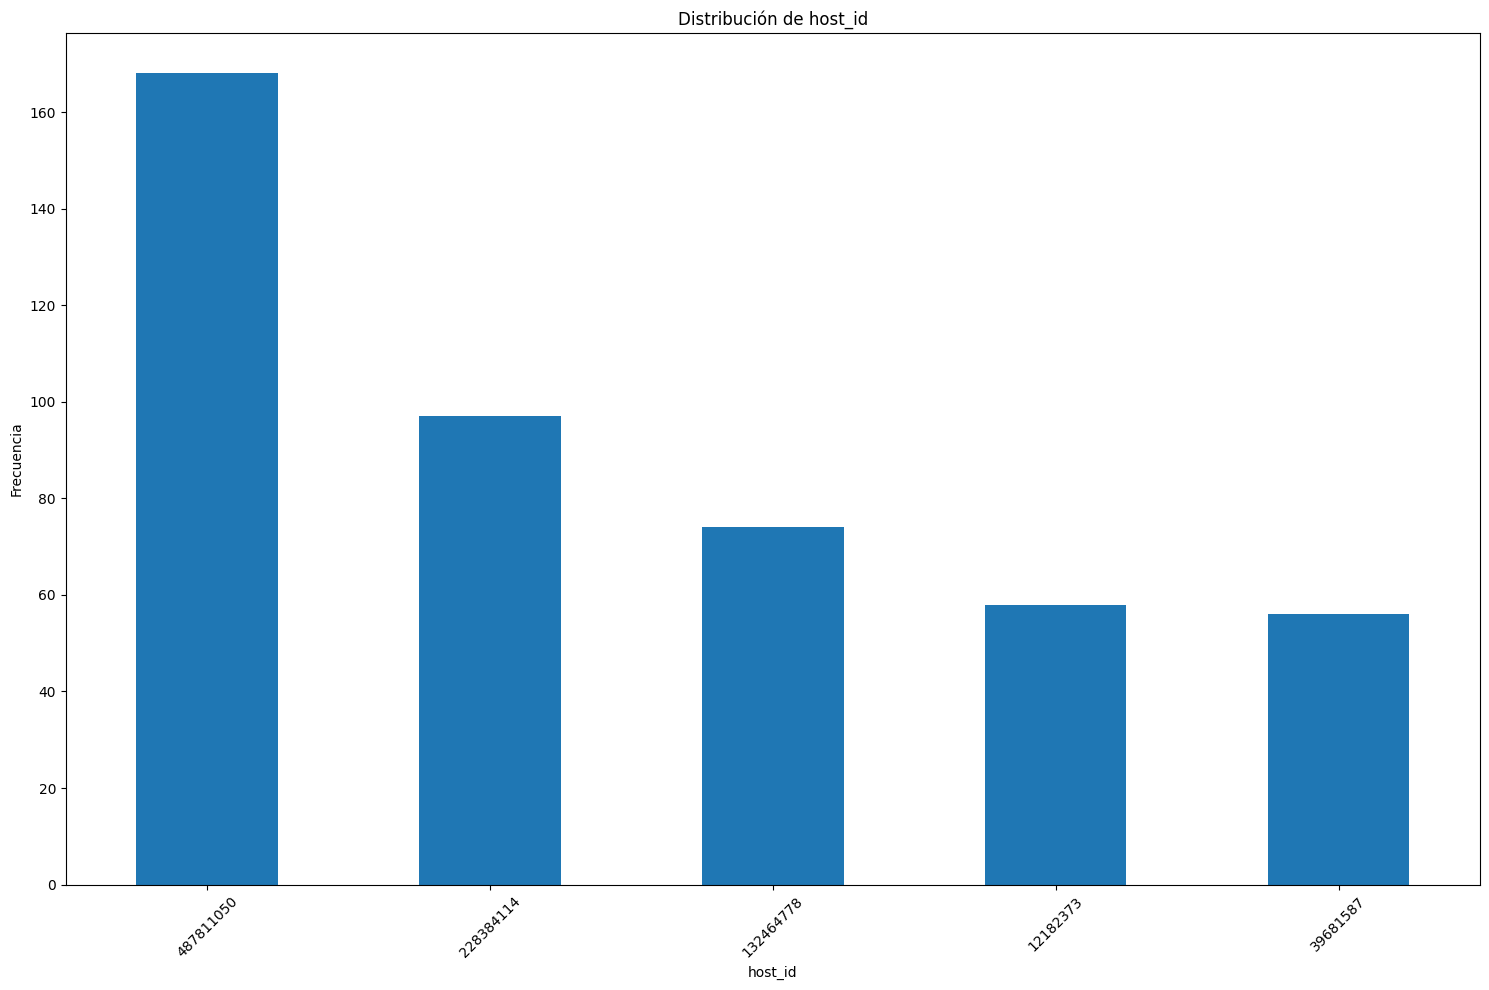


Tabla de frecuencias para host_identity_verified:
  host_identity_verified  frequency  percentage  cumulative_perc
0                      t       4461    0.955656         0.955656
1                      f        207    0.044344         1.000000


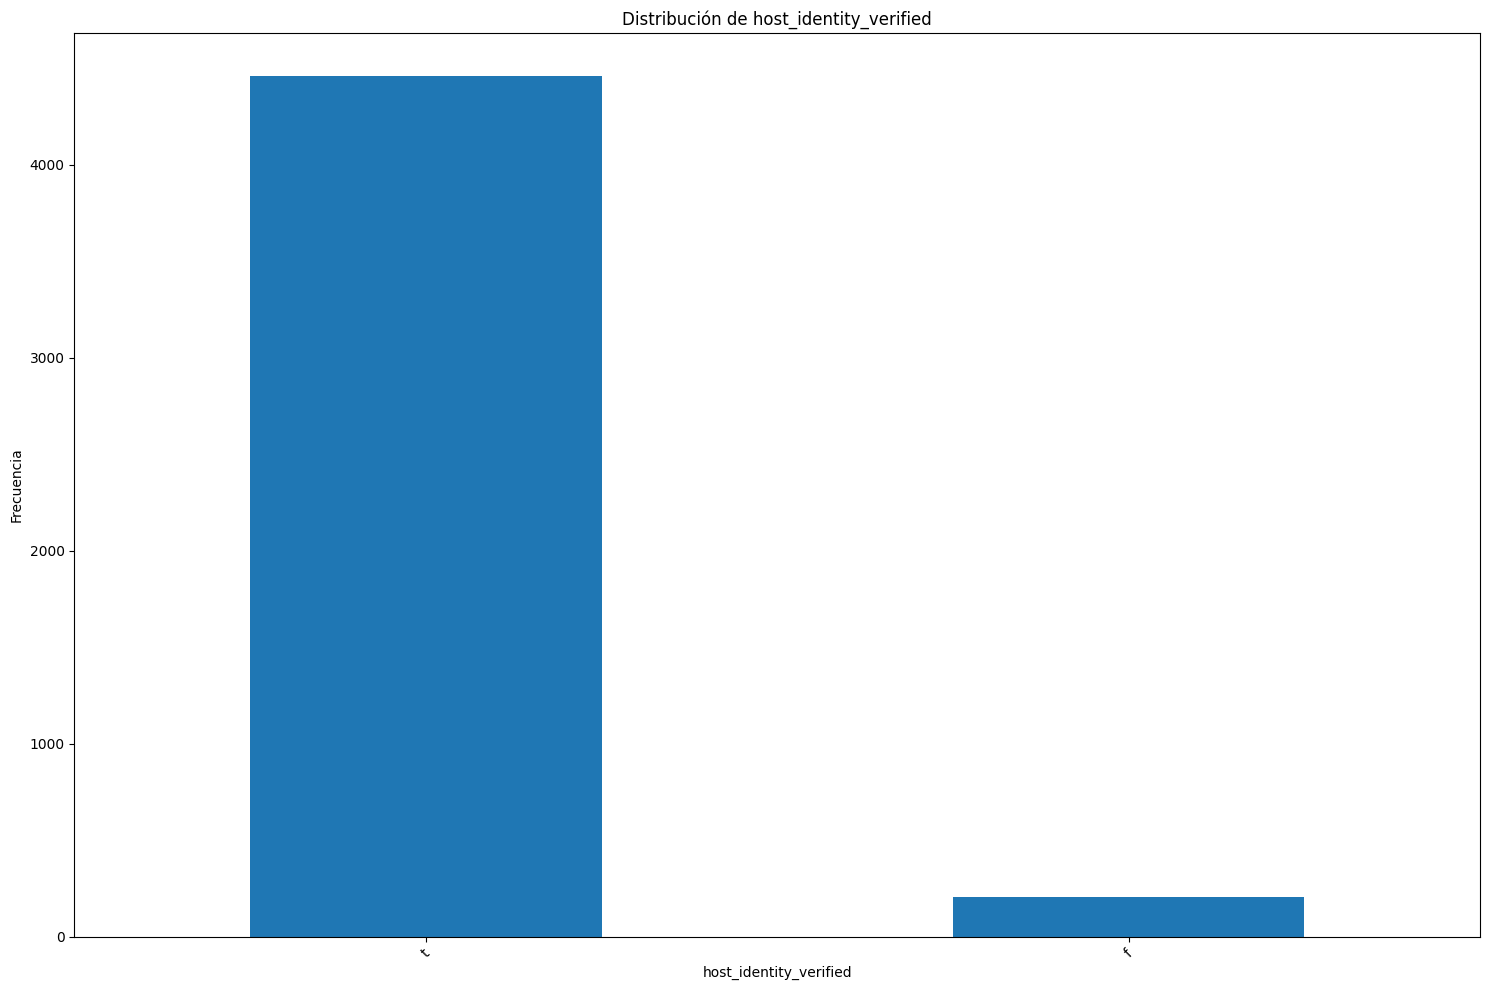


Tabla de frecuencias para host_acceptance_rate:
     host_acceptance_rate  frequency  percentage  cumulative_perc
0                    100%       2290    0.490574         0.490574
1                     99%        341    0.073051         0.563625
2                     97%        261    0.055913         0.619537
3                     98%        233    0.049914         0.669452
4   Este_es_un_valor_nulo        214    0.045844         0.715296
..                    ...        ...         ...              ...
89                    22%          1    0.000214         0.999143
90                    34%          1    0.000214         0.999357
91                     9%          1    0.000214         0.999572
92                    13%          1    0.000214         0.999786
93                    49%          1    0.000214         1.000000

[94 rows x 4 columns]


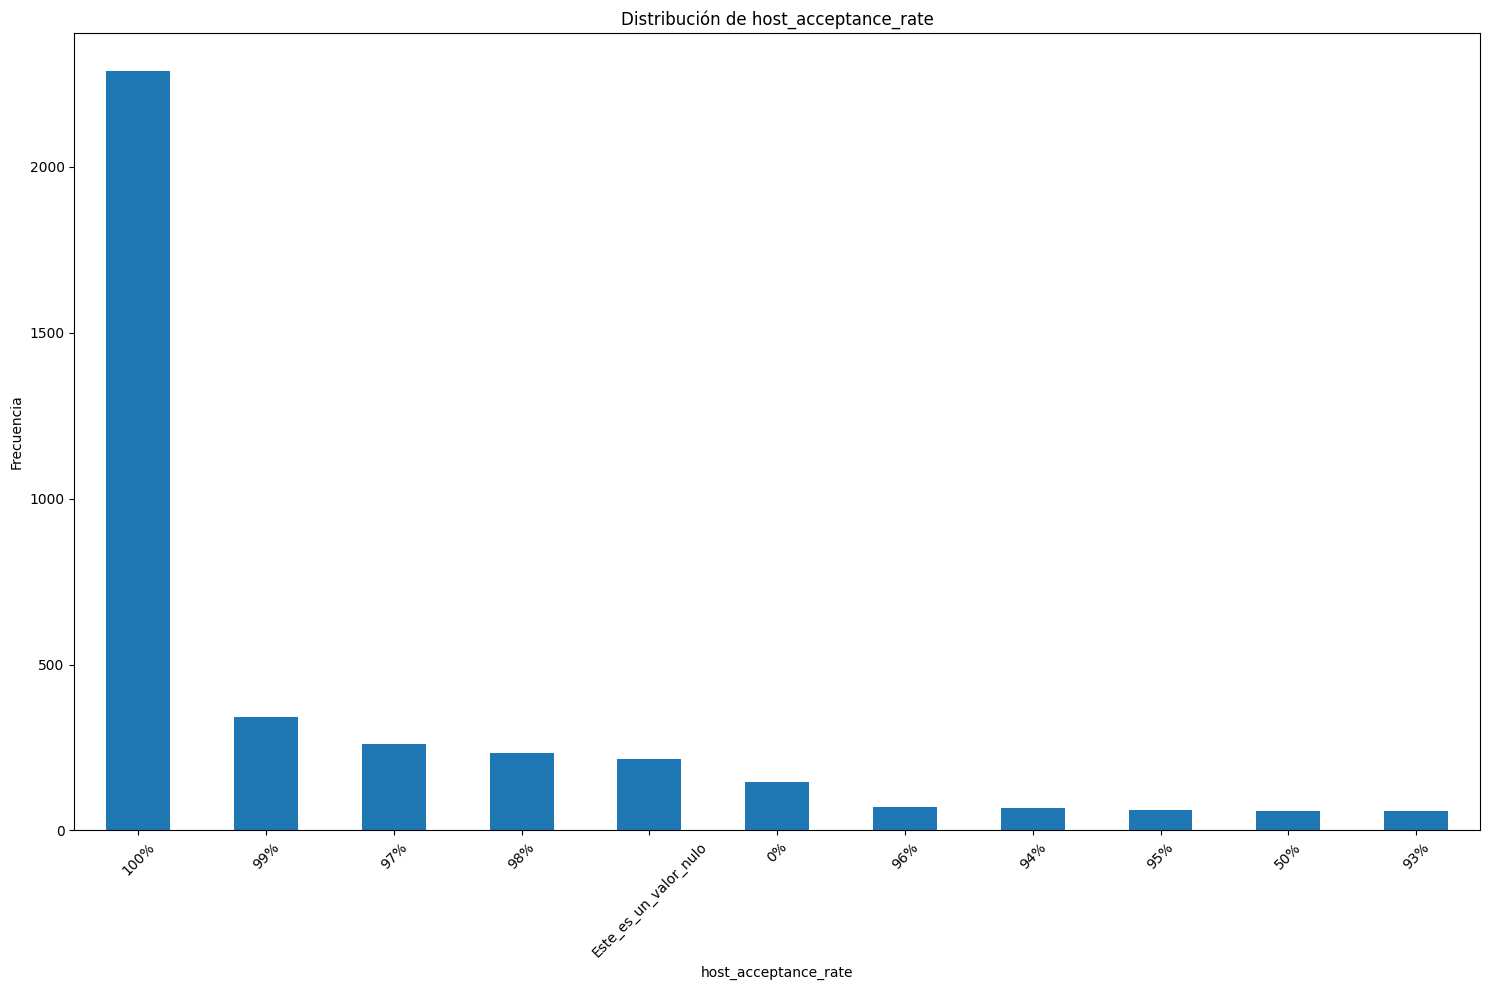


Tabla de frecuencias para property_type:
                        property_type  frequency  percentage  cumulative_perc
0                  Entire rental unit       2073    0.444087         0.444087
1                        Entire condo        744    0.159383         0.603470
2                Entire vacation home        593    0.127035         0.730506
3         Private room in rental unit        392    0.083976         0.814482
4   Private room in bed and breakfast        279    0.059769         0.874250
5               Private room in condo        145    0.031063         0.905313
6                         Entire home         82    0.017566         0.922879
7       Private room in vacation home         72    0.015424         0.938303
8                         Entire loft         69    0.014781         0.953085
9           Entire serviced apartment         53    0.011354         0.964439
10               Private room in home         41    0.008783         0.973222
11                 Roo

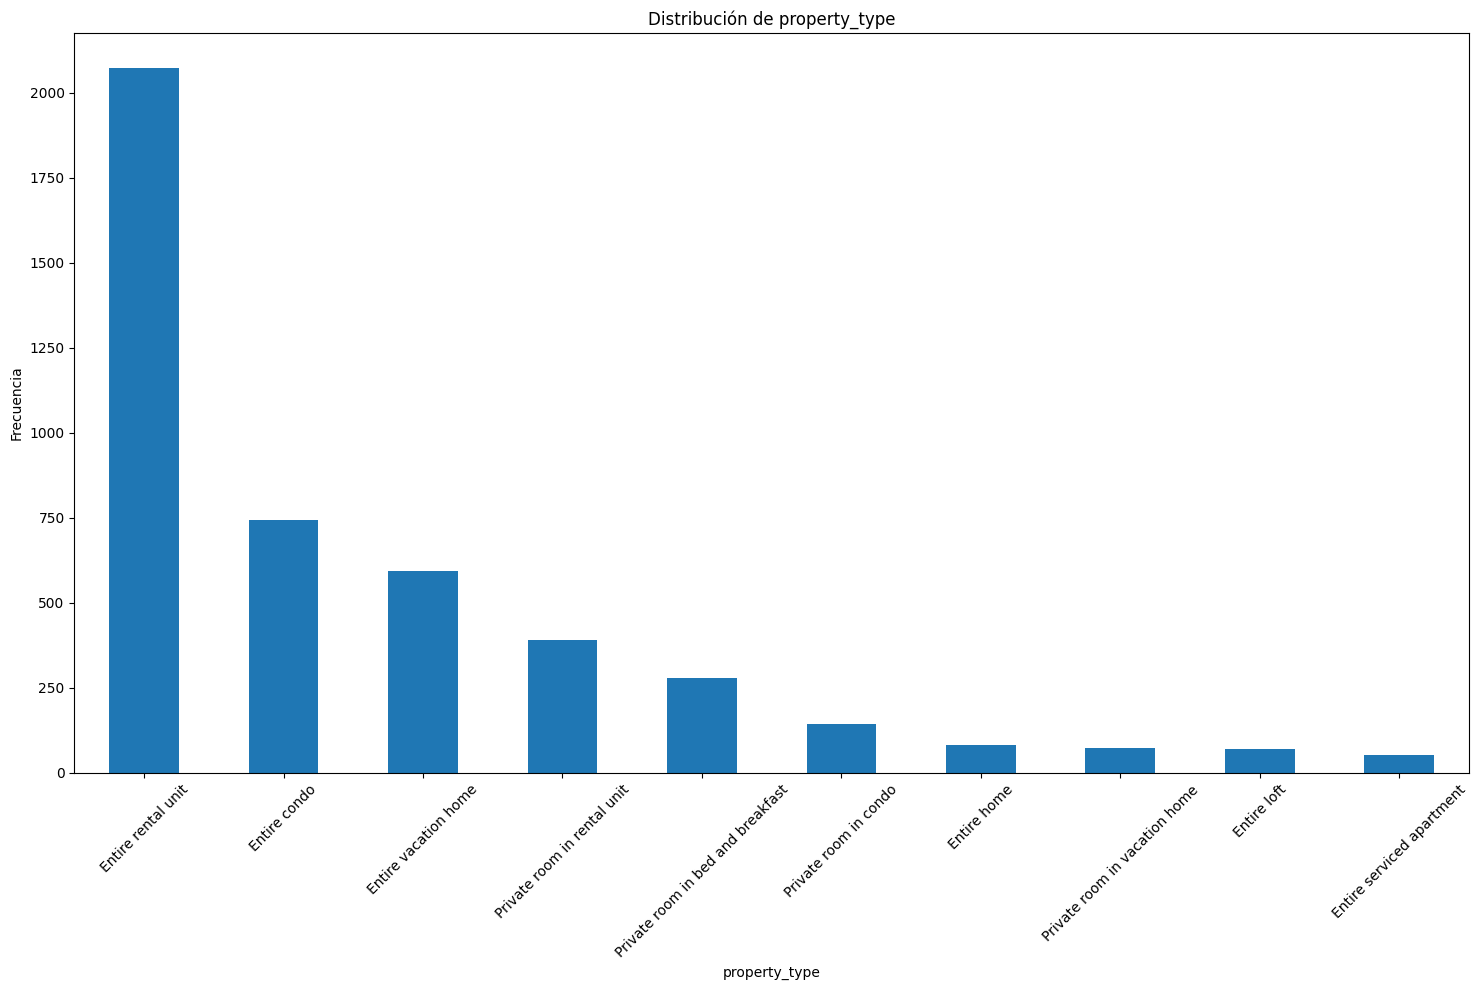


Tabla de frecuencias para bathrooms_text:
           bathrooms_text  frequency  percentage  cumulative_perc
0                  1 bath       3091    0.662168         0.662168
1                 2 baths        523    0.112039         0.774207
2          1 private bath        504    0.107969         0.882177
3           1 shared bath        305    0.065338         0.947515
4               1.5 baths        102    0.021851         0.969366
5                 3 baths         48    0.010283         0.979649
6          2 shared baths         21    0.004499         0.984147
7                 0 baths         13    0.002785         0.986932
8                 4 baths         11    0.002356         0.989289
9               2.5 baths         10    0.002142         0.991431
10       Shared half-bath          6    0.001285         0.992716
11       1.5 shared baths          6    0.001285         0.994002
12              3.5 baths          4    0.000857         0.994859
13                5 baths        

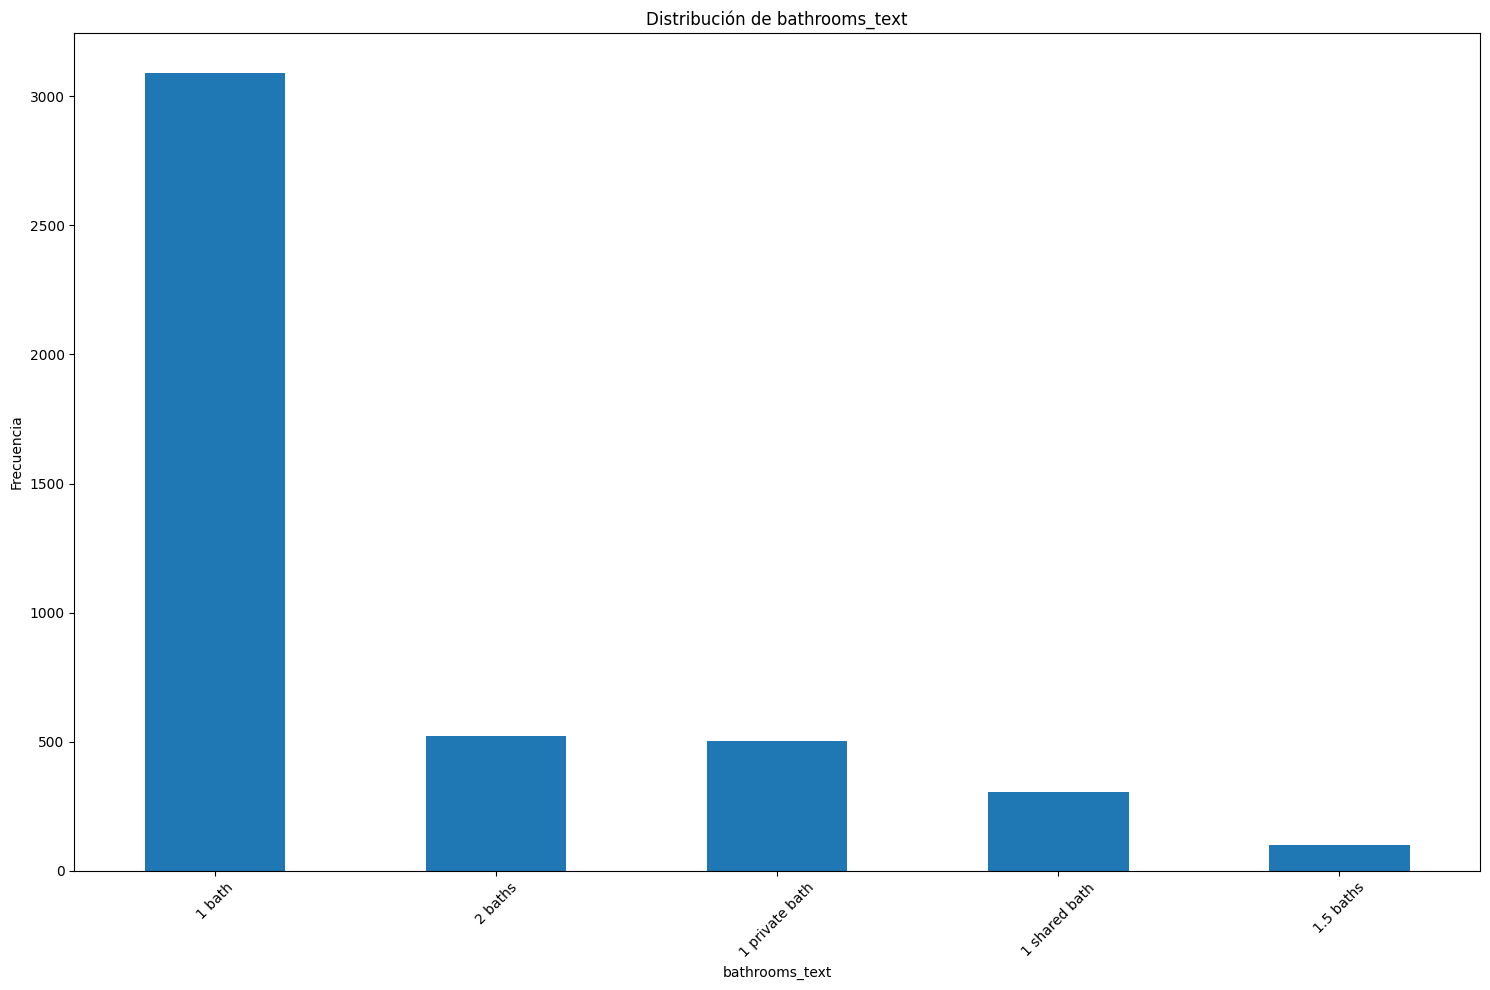


Tabla de frecuencias para instant_bookable:
  instant_bookable  frequency  percentage  cumulative_perc
0                t       2473    0.529777         0.529777
1                f       2195    0.470223         1.000000


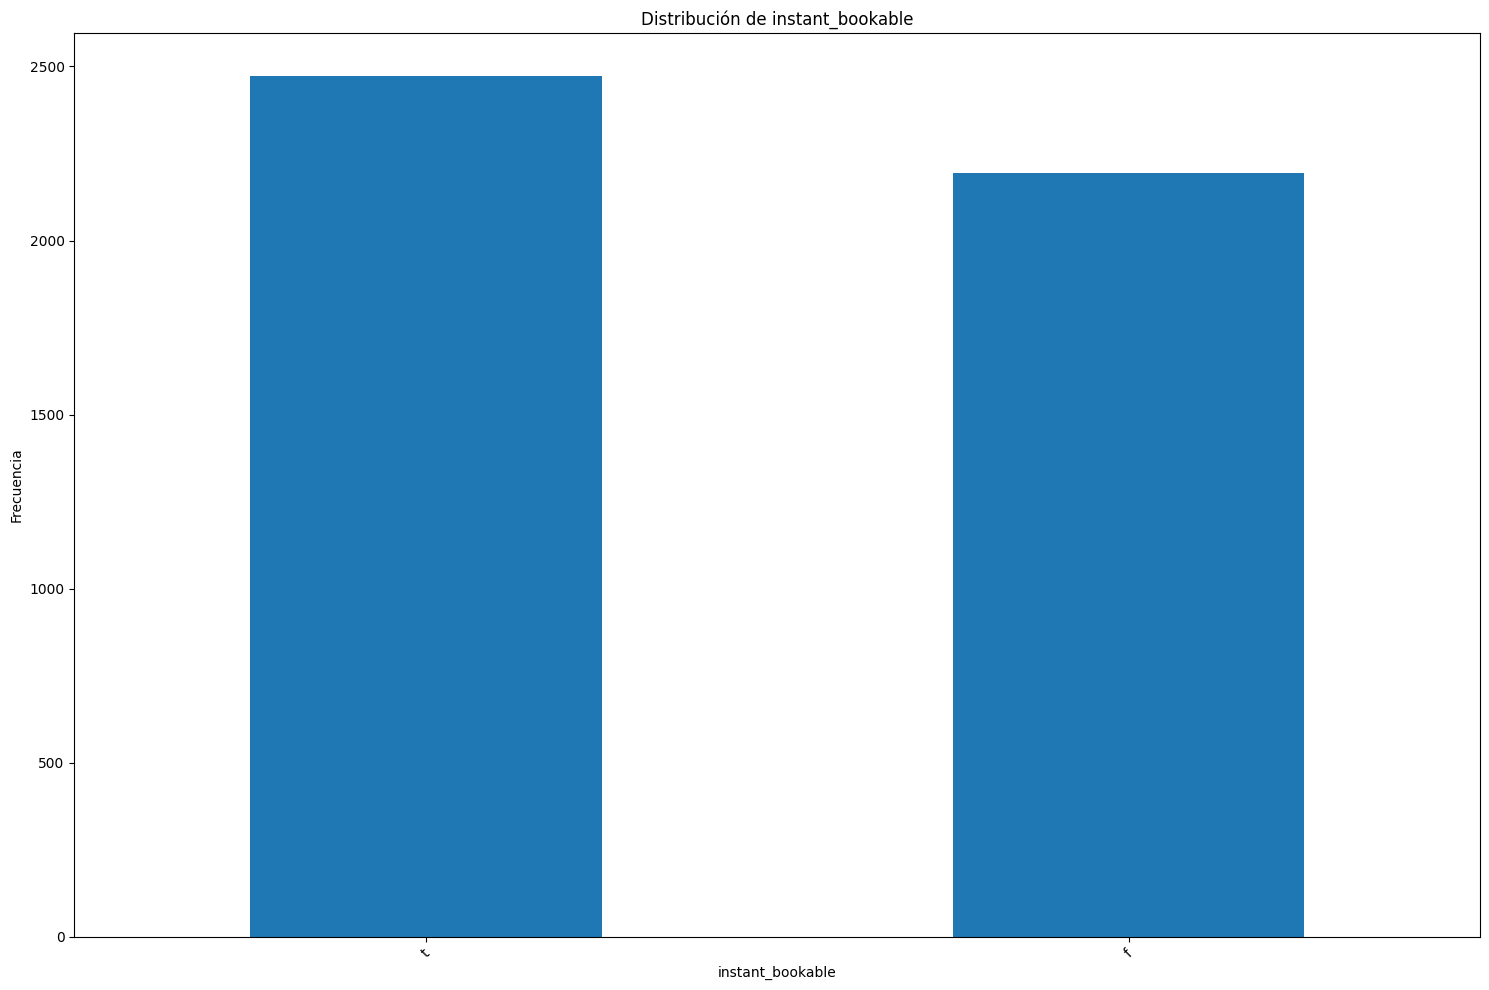


Tabla de frecuencias para accommodates:
No categorical variables to analyze.


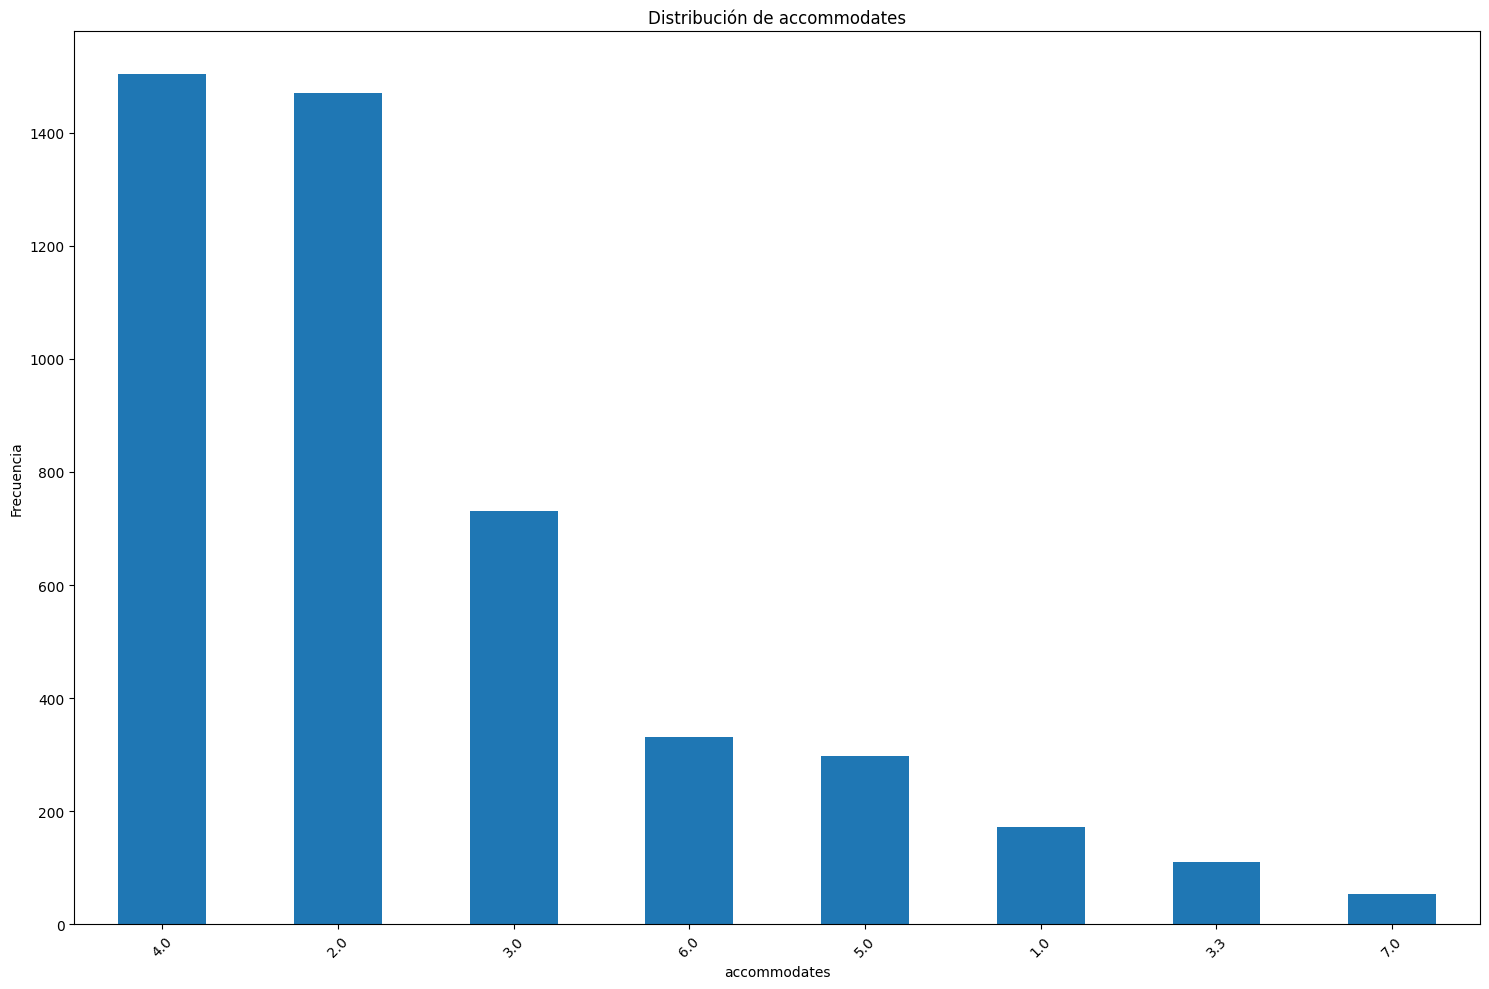


Tabla de frecuencias para bedrooms:
No categorical variables to analyze.


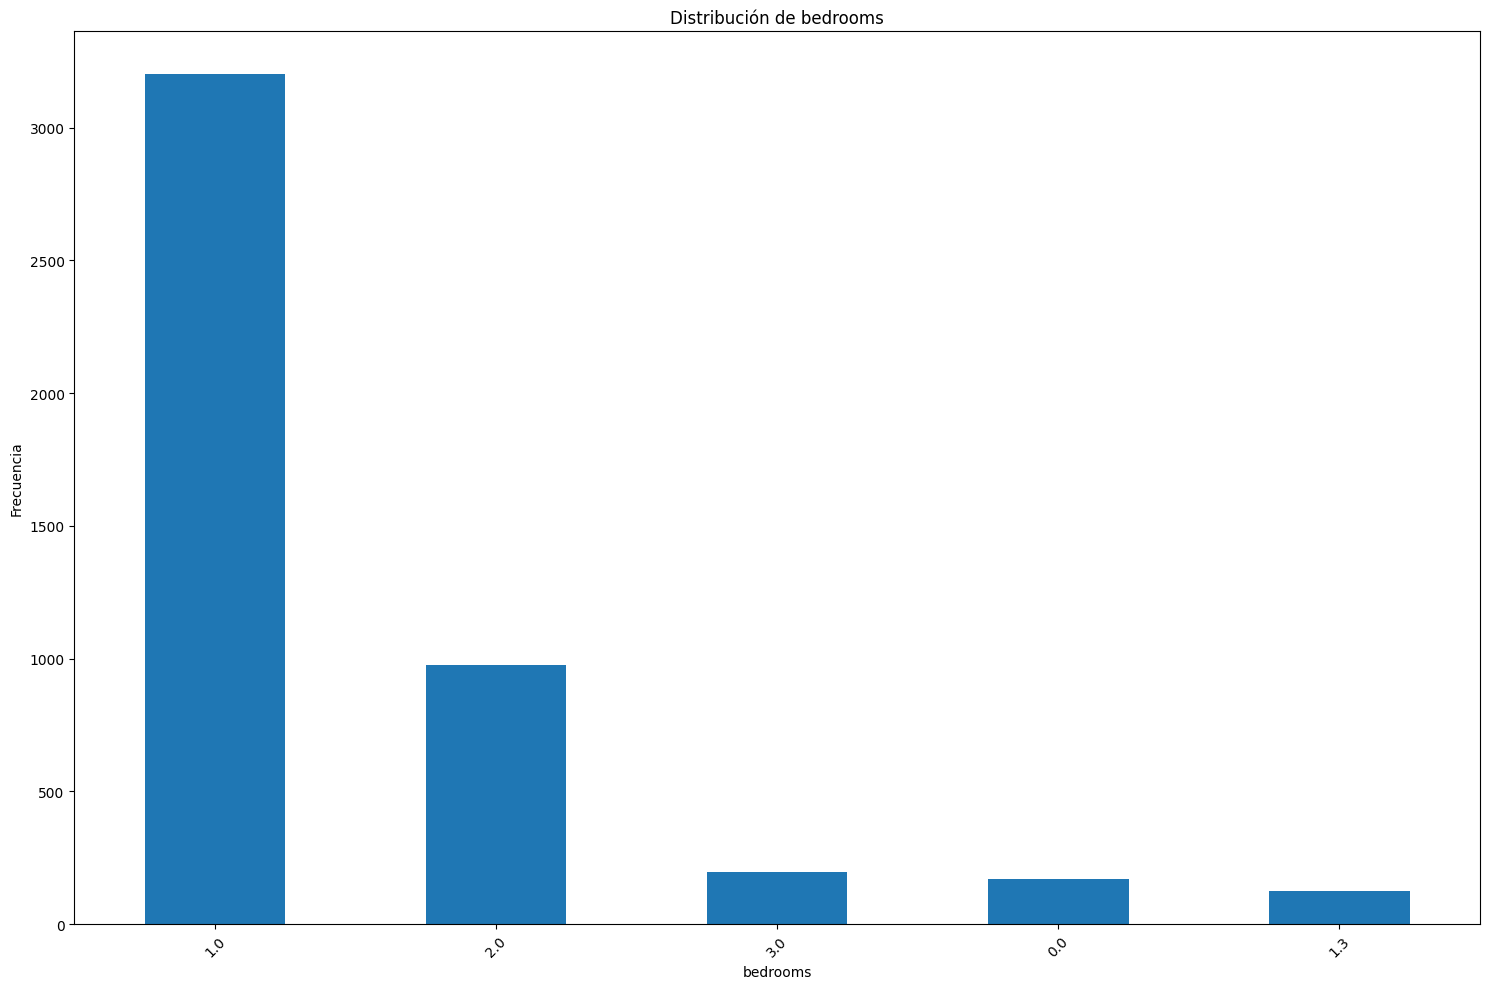


Tabla de frecuencias para beds:
No categorical variables to analyze.


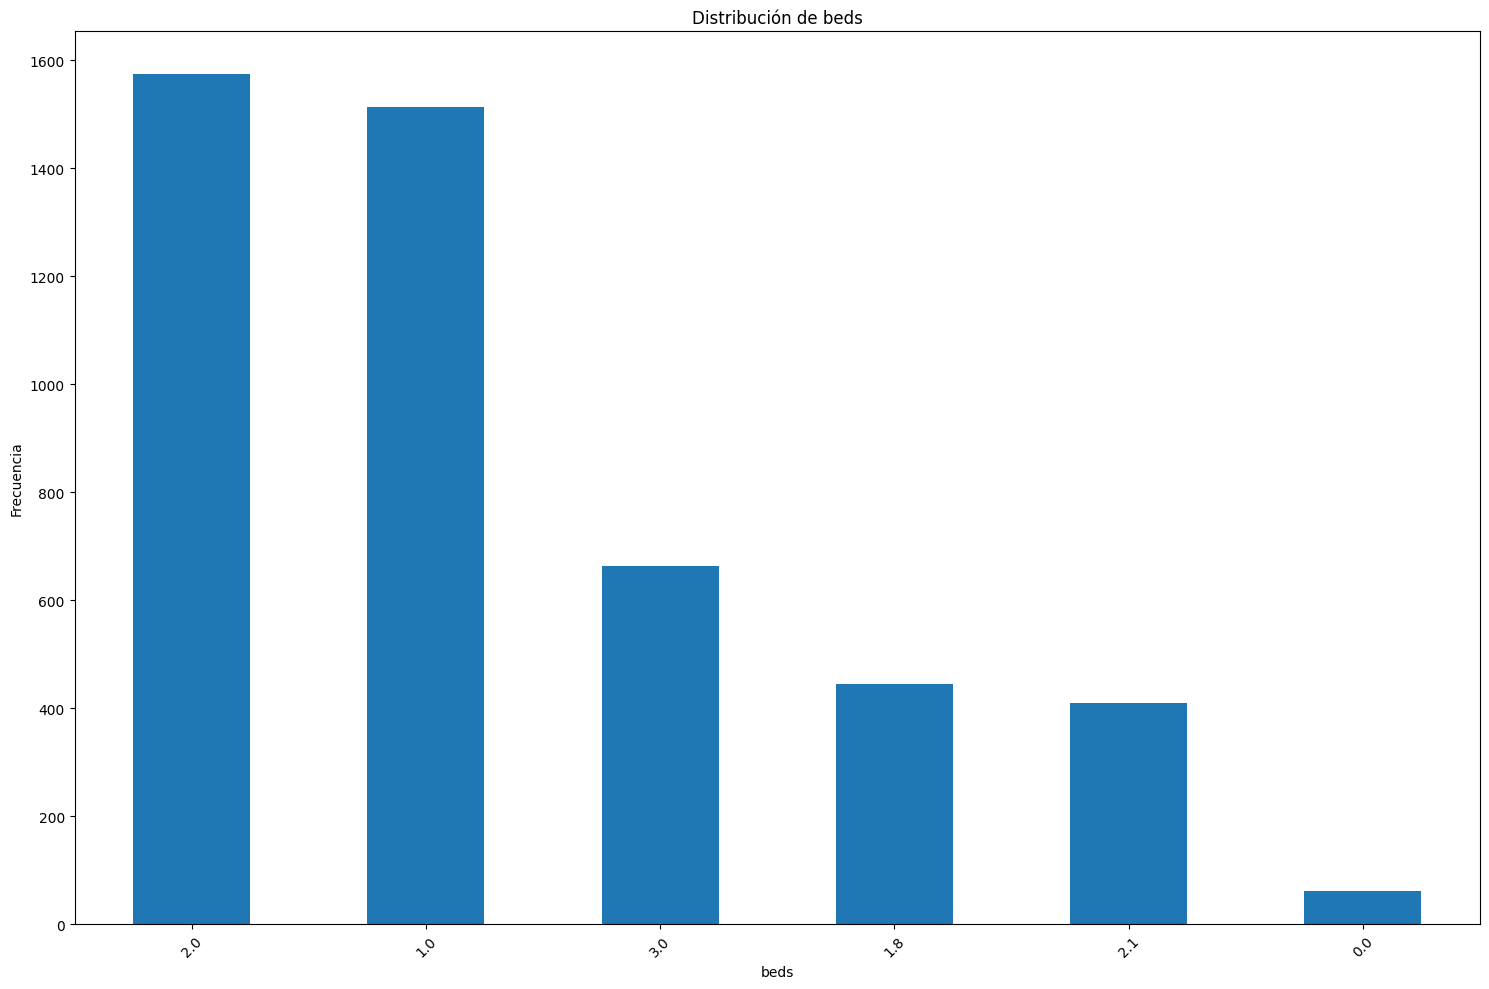


Tabla de frecuencias para reviews_per_month:
No categorical variables to analyze.


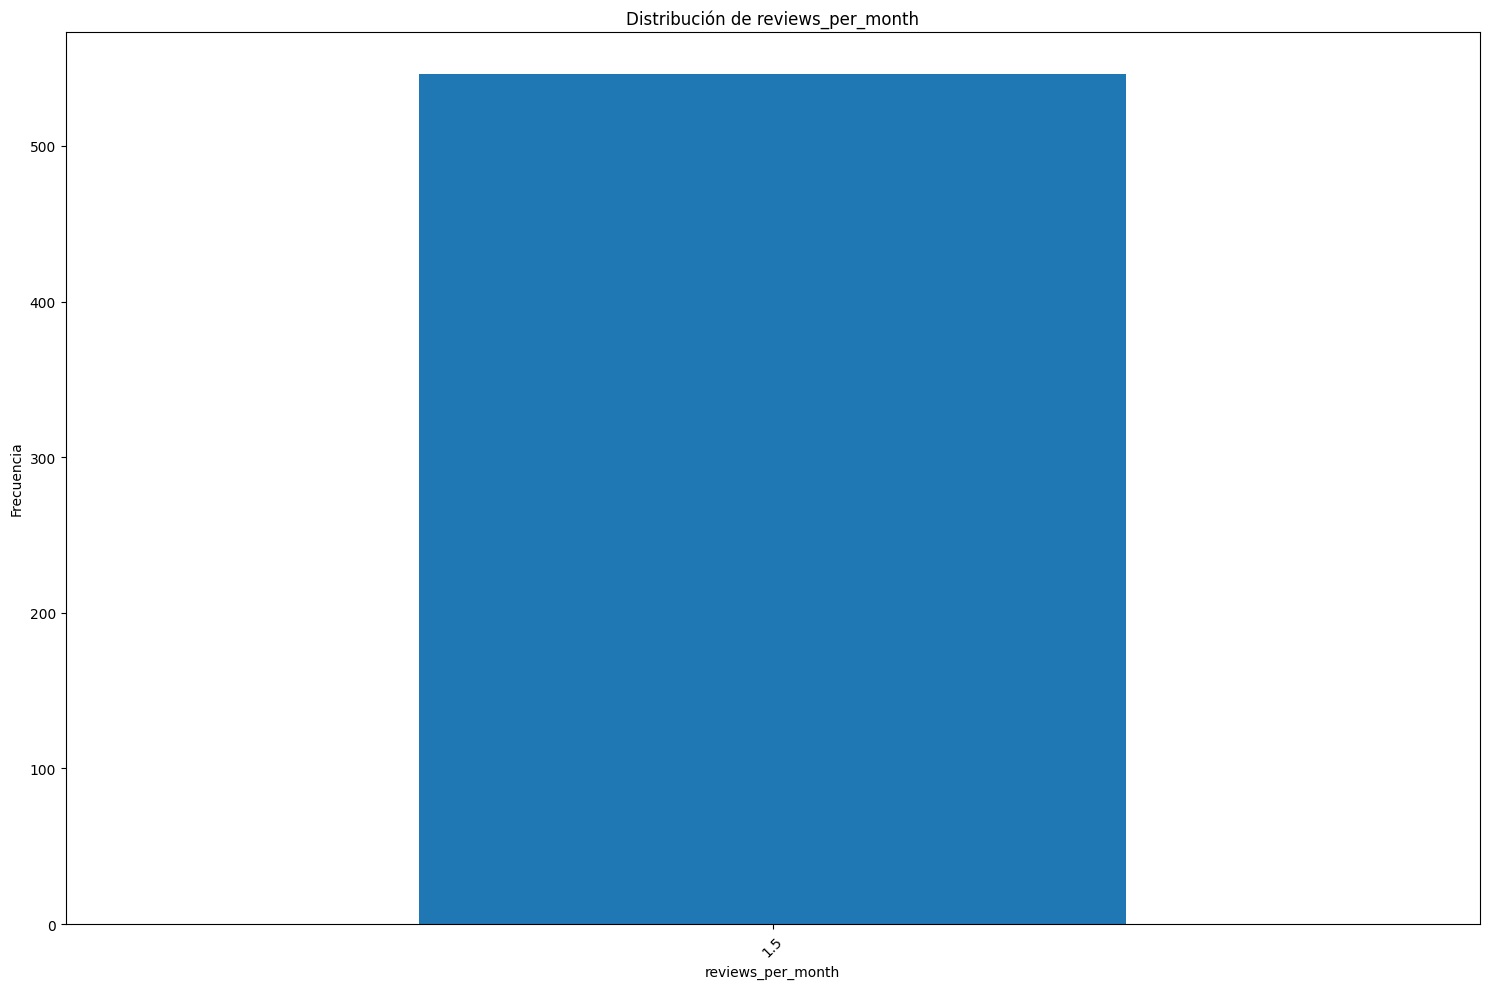


Tabla de frecuencias para minimum_nights:
No categorical variables to analyze.


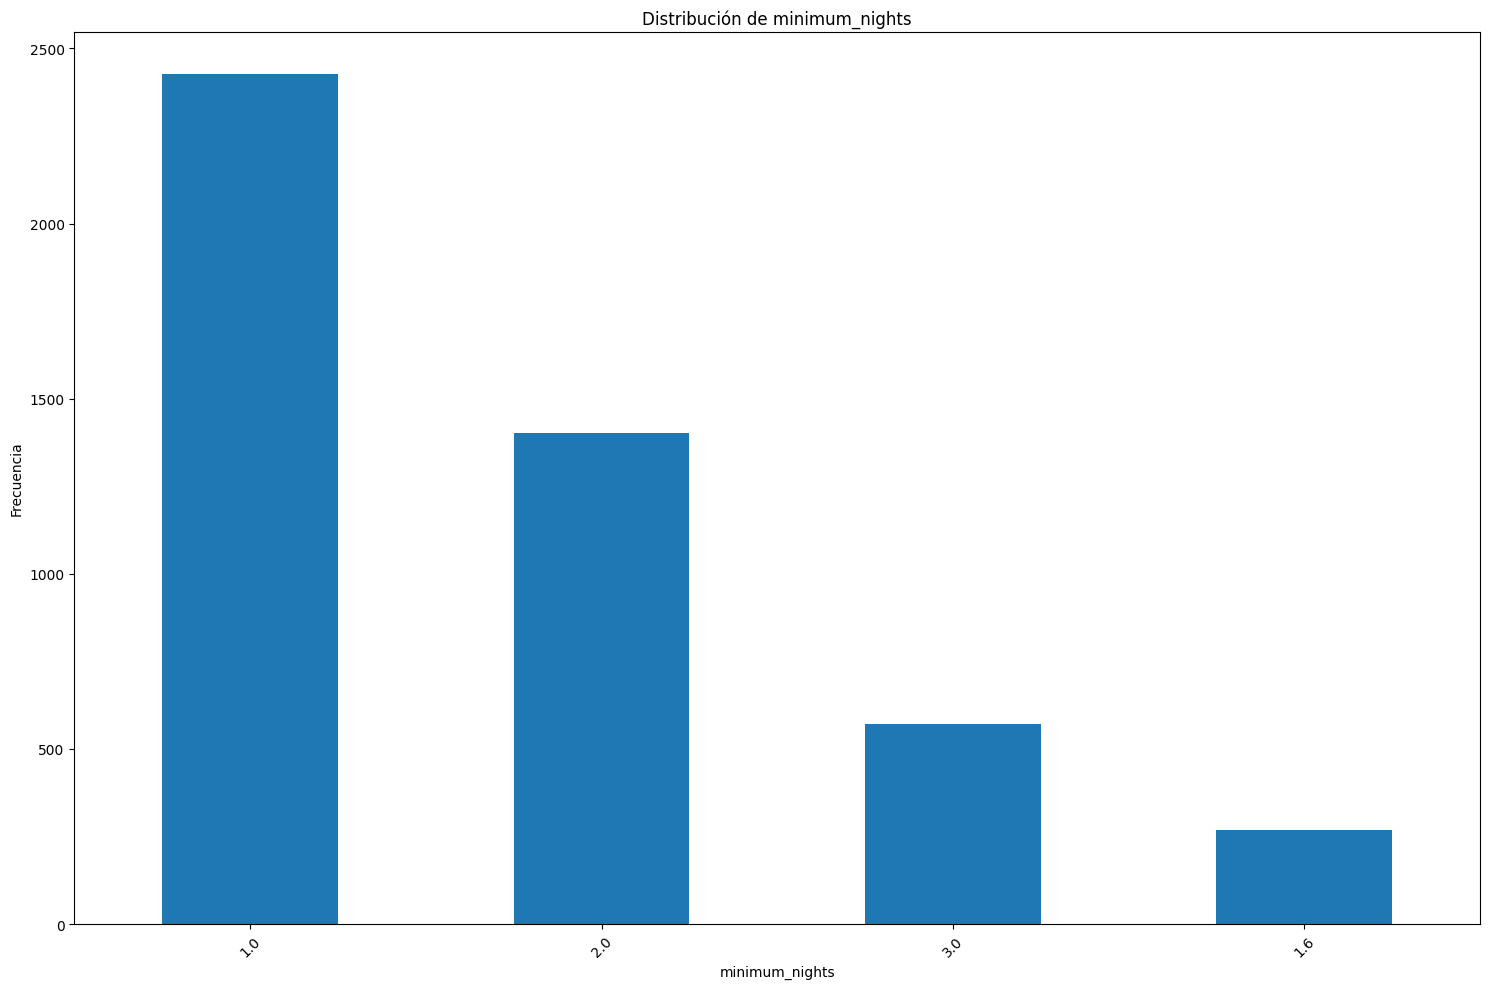


Tabla de frecuencias para review_scores_rating:
No categorical variables to analyze.


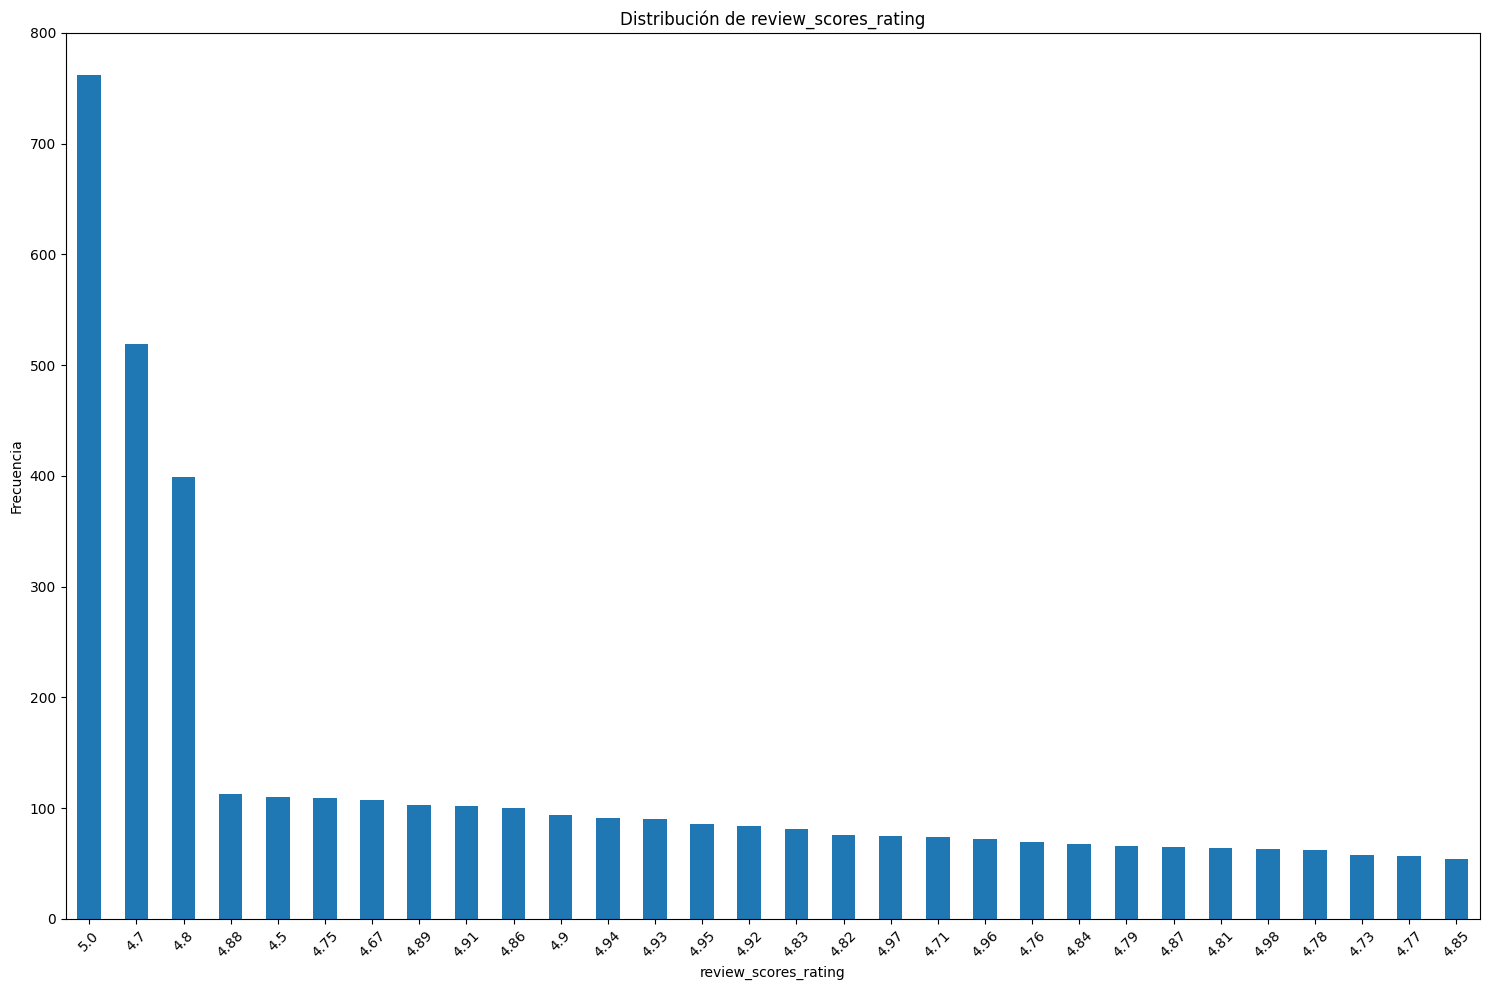


Tabla de frecuencias para review_scores_cleanliness:
No categorical variables to analyze.


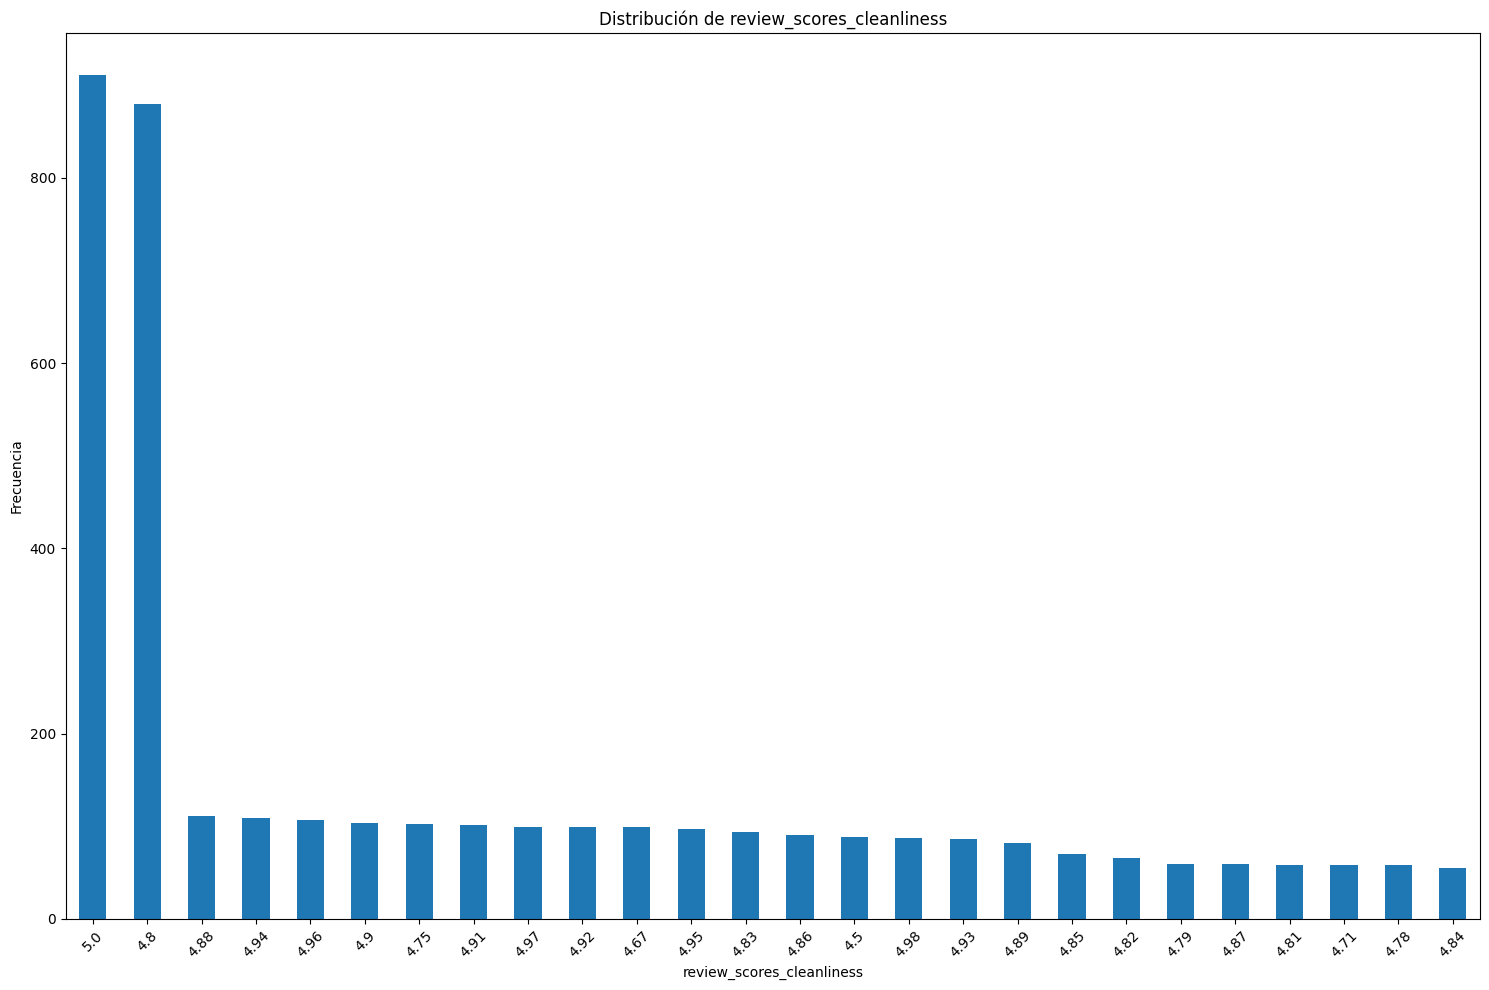


Tabla de frecuencias para review_scores_communication:
No categorical variables to analyze.


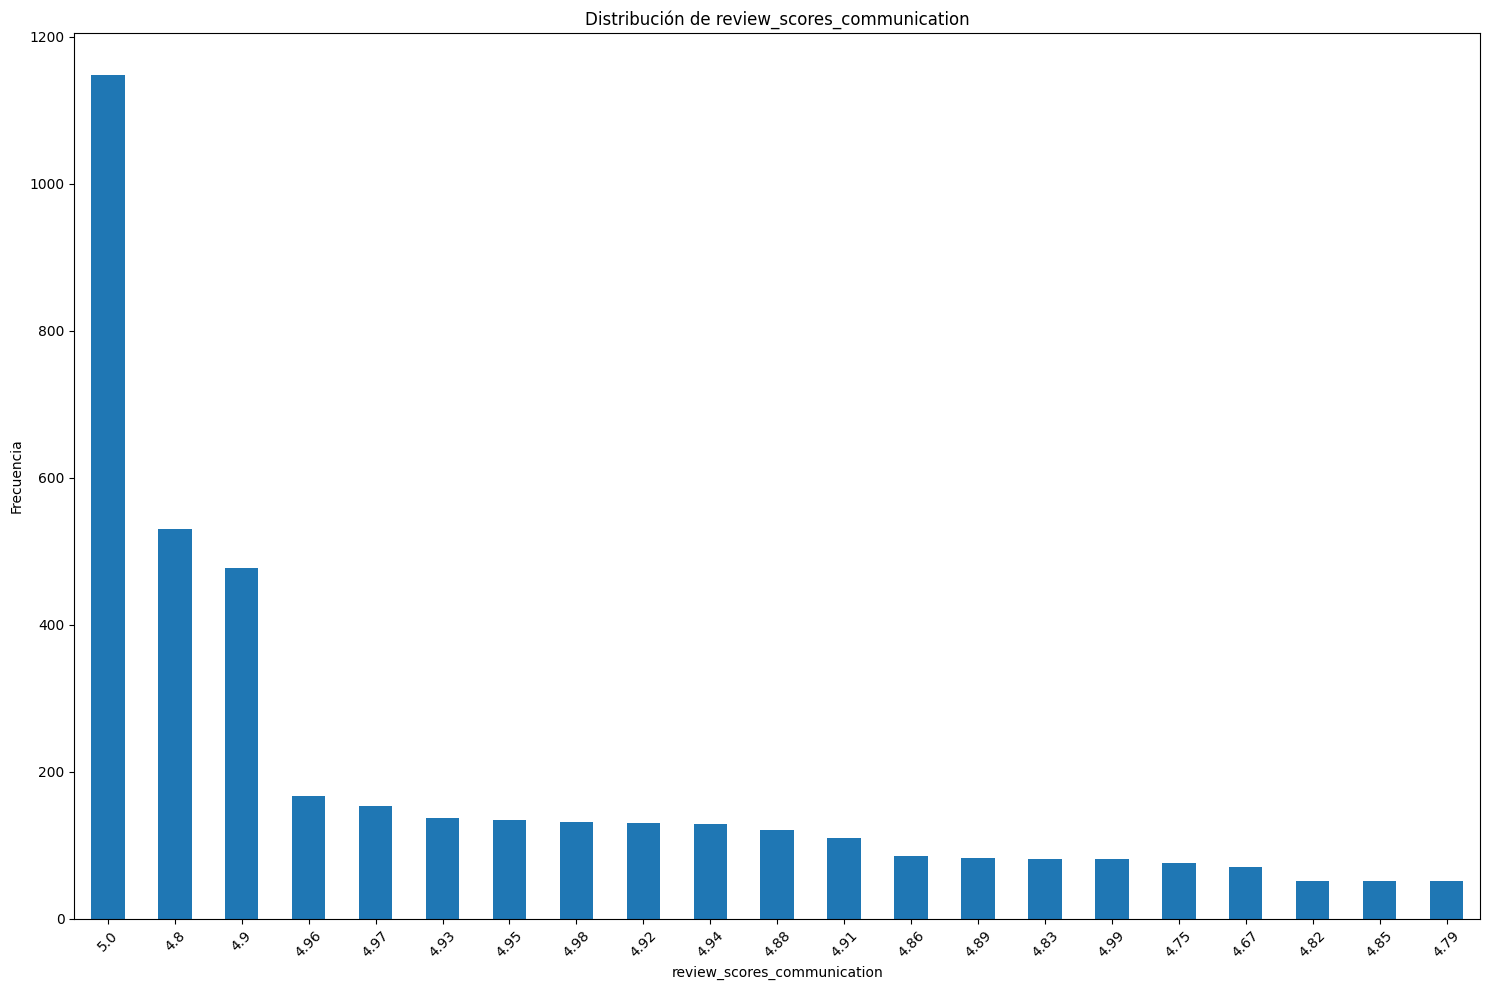

In [38]:
columnas_categoricas = [
    'host_response_time',
    'host_id',
    'host_identity_verified',
    'host_acceptance_rate',
    'property_type',
    'bathrooms_text',
    'instant_bookable',
    'accommodates',
    'bedrooms',
    'beds',
    'reviews_per_month',
    'minimum_nights',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_communication'
]

# Realizar el análisis univariado para cada variable
for var in columnas_categoricas:
    # Obtener la tabla de frecuencias
    freq_table = freq_tbl(df[var])
    print(f"\nTabla de frecuencias para {var}:")
    print(freq_table)
    
    # Crear gráficos solo con categorías que tengan frecuencia >= 50
    valores = df[var].value_counts()
    filtrados = valores[valores >= 50]
    
    if not filtrados.empty:
        plt.figure(figsize=(15, 10))
        filtrados.plot(kind='bar')
        plt.title(f'Distribución de {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

**Categorización**
nota: debido a que algunas columnas pedidas (2) no se encontraban en mi dataframe y varias para categorizar estaban como string la conversion fue complicada, intenté el método de la clase y no lograba hacerlo e investigué este método igual de Sturges con un ciclo y logré hacer el intento obteniendo algunos resultados:

In [39]:
import seaborn as sns

In [40]:
#Funcion que calcula el número de bins usando la regla de Sturges
def sturges_bins(data):
    data = data[np.isfinite(data)] # Elimina valores infinitos
    if len(data) == 0:
        return 1 # Devuelve un valor mínimo si no hay datos válidos

    n = len(data)
    if n == 0:
      return 1

    log_n = np.log10(n)

    if np.isnan(log_n) or np.isinf(log_n):
      return 1

    k = int(np.ceil(1 + 3.322 * log_n))
    return k

#Esta función categoriza una variable usando la regla de Sturges y devuelve las categorías
def categorize_variable(df, column_name):
    cleaned_data = df[column_name].dropna()
    cleaned_data = cleaned_data[np.isfinite(cleaned_data)]

    if cleaned_data.empty:
        print(f"La columna '{column_name}' está vacía después de la limpieza. No se puede categorizar.")
        return None  

    bins = sturges_bins(cleaned_data)
    categories = pd.cut(cleaned_data, bins=bins)
    return categories

#Función para graficar
def plot_category_frequencies(categories, column_name):
    if categories is None:
        print(f"No se puede graficar '{column_name}' debido a que no se pudo categorizar.")
        return  # No graficar si no se pudo categorizar
    plt.figure(figsize=(15,10))
    sns.countplot(x=categories, order=categories.cat.categories)
    plt.title(f'Frecuencia de Categorías para {column_name}')
    plt.xticks(rotation=45)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


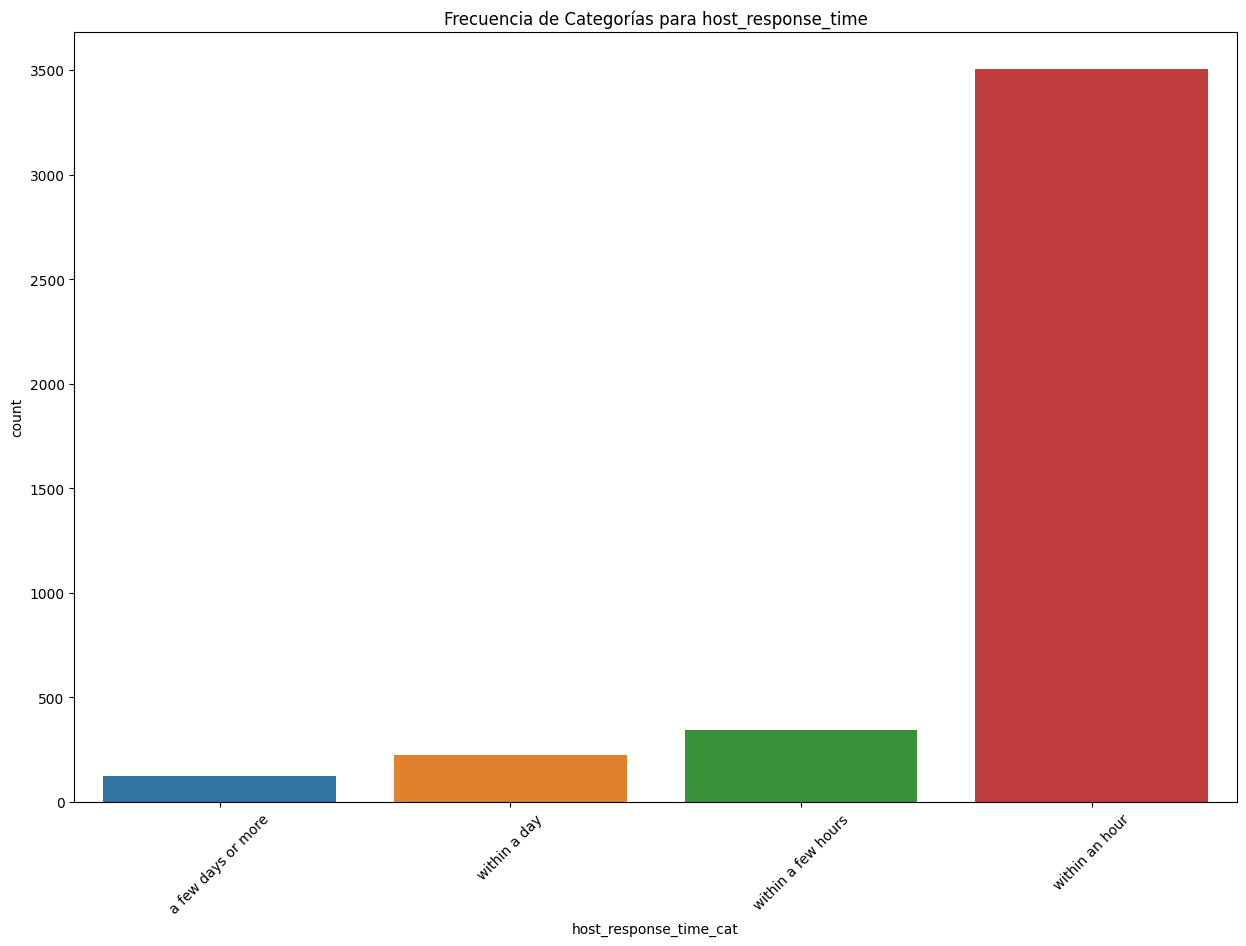

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


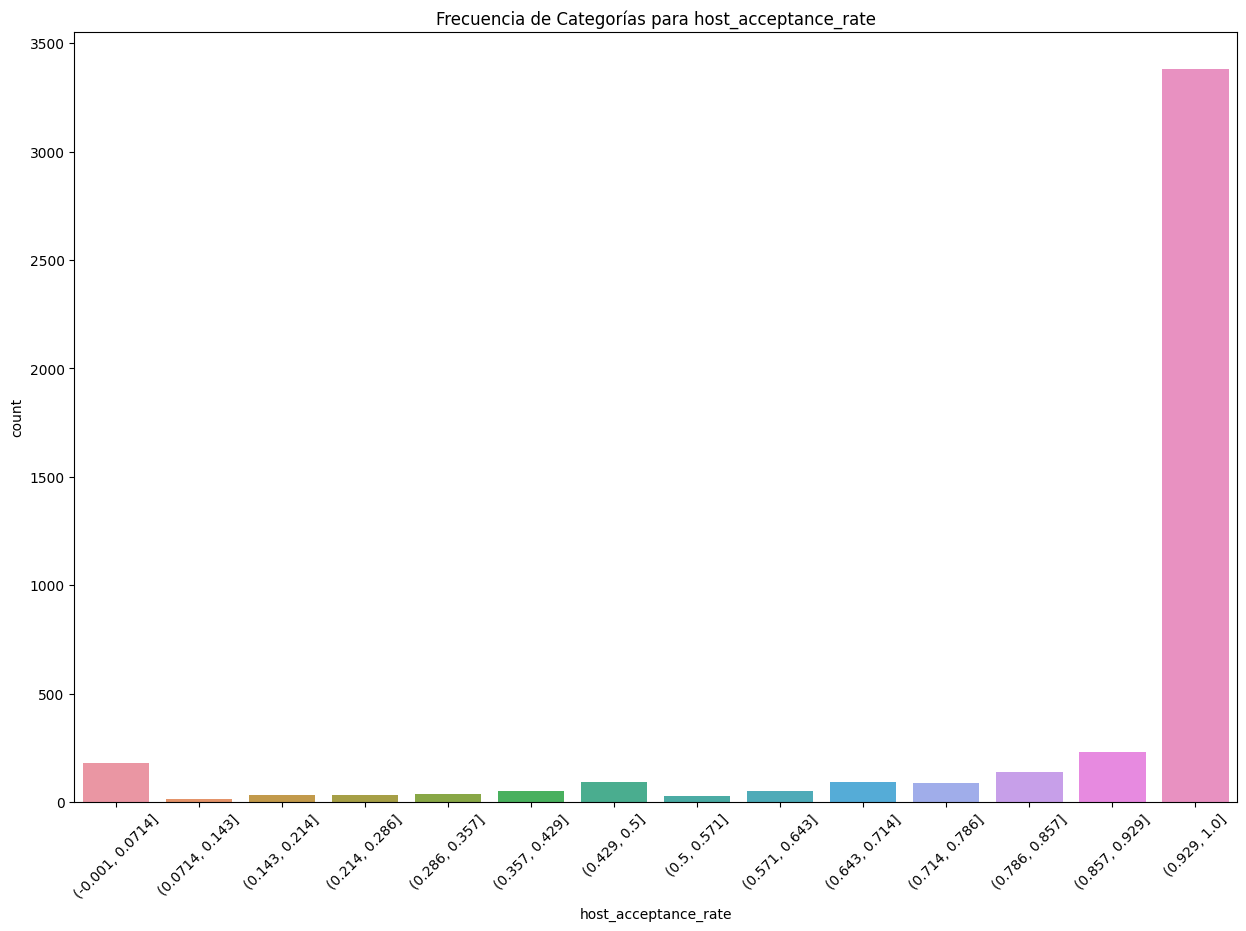

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


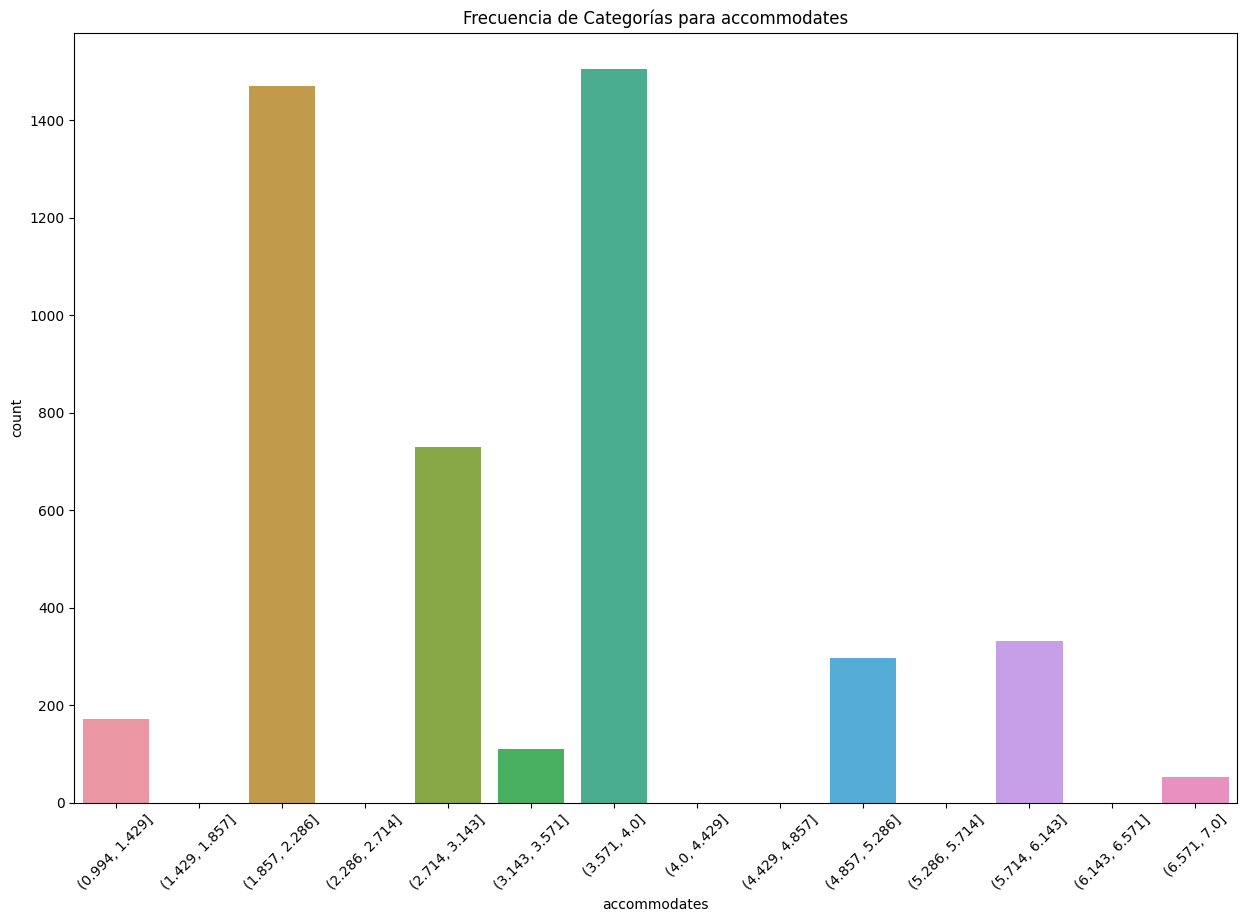

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


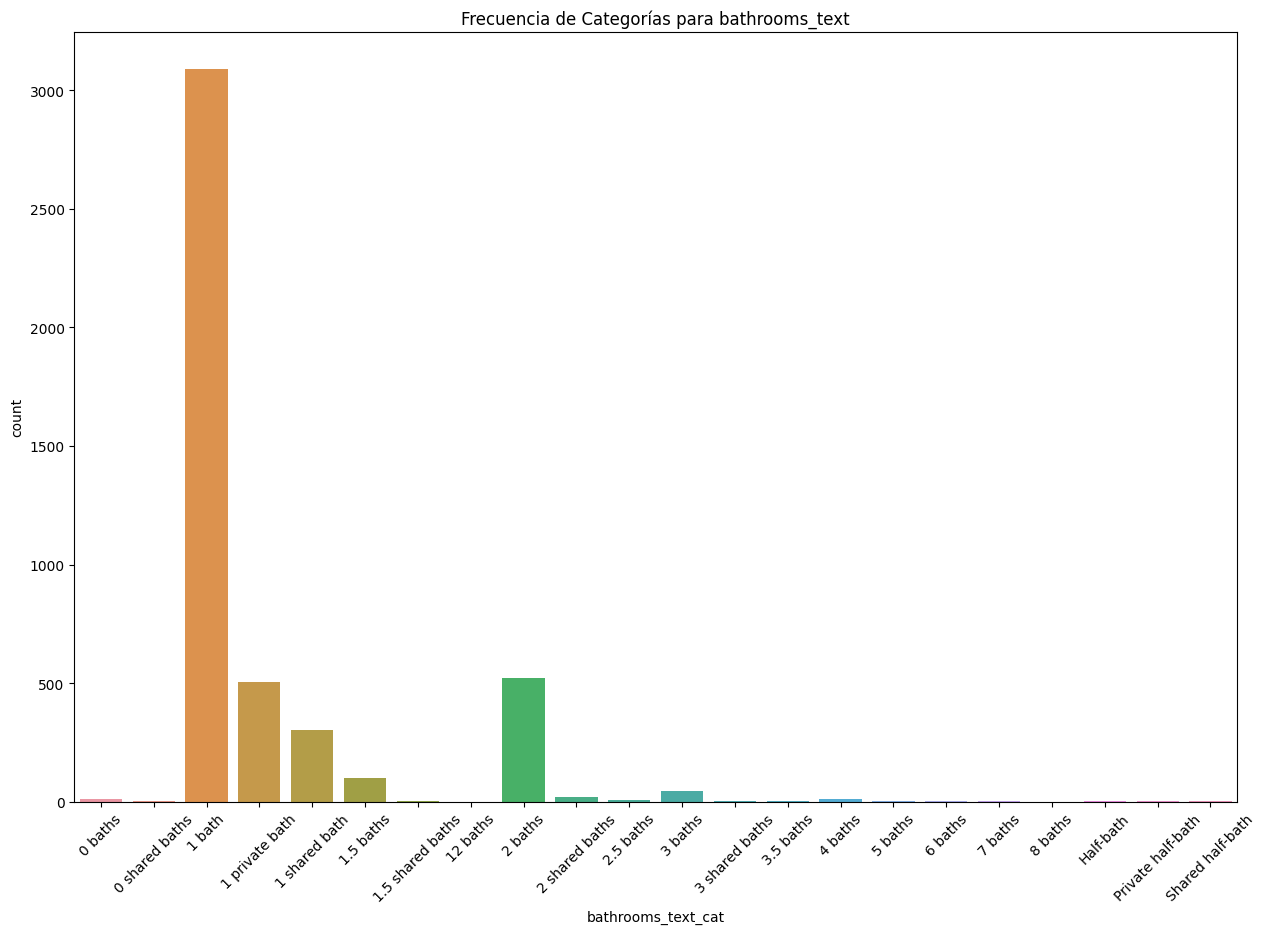

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


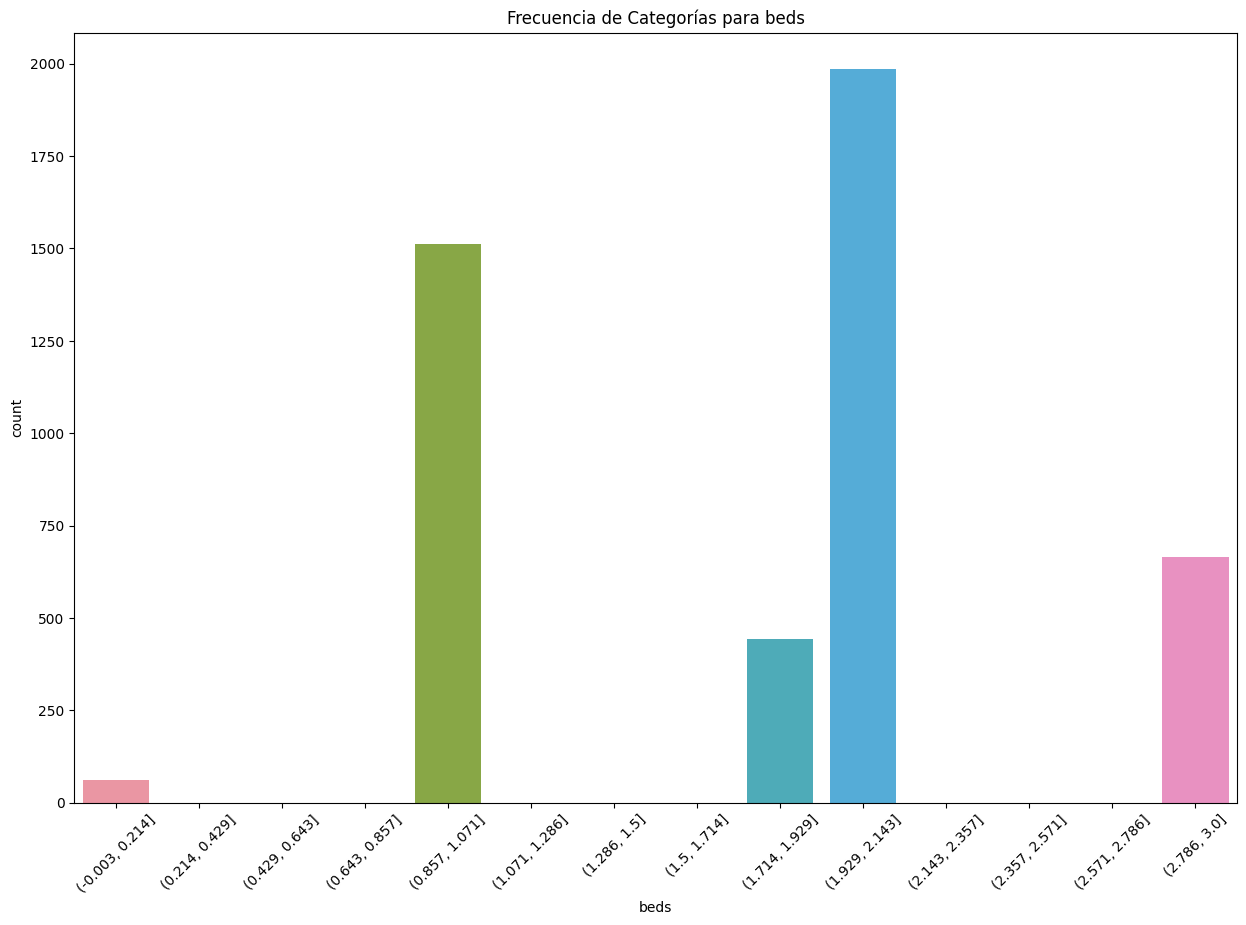

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


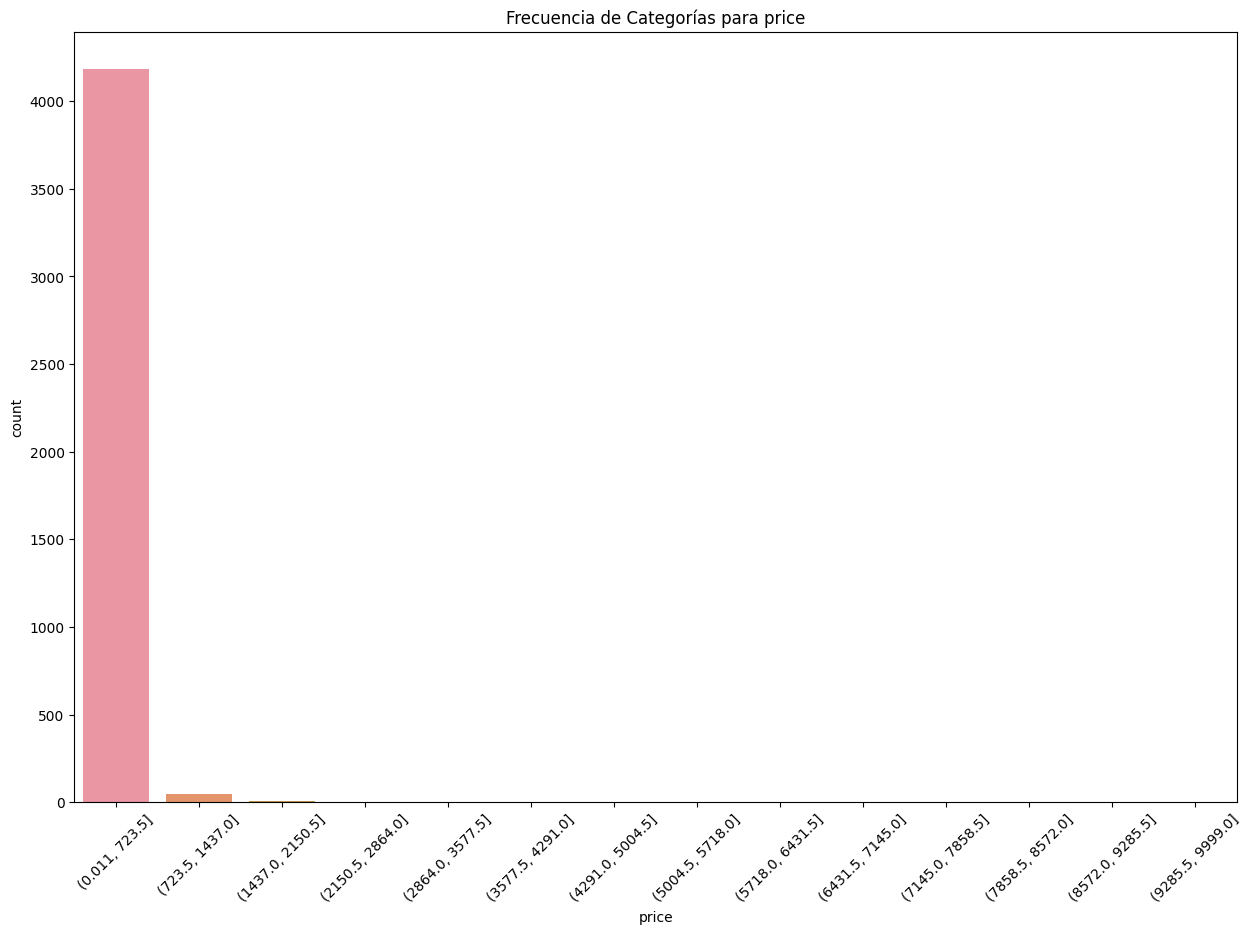

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


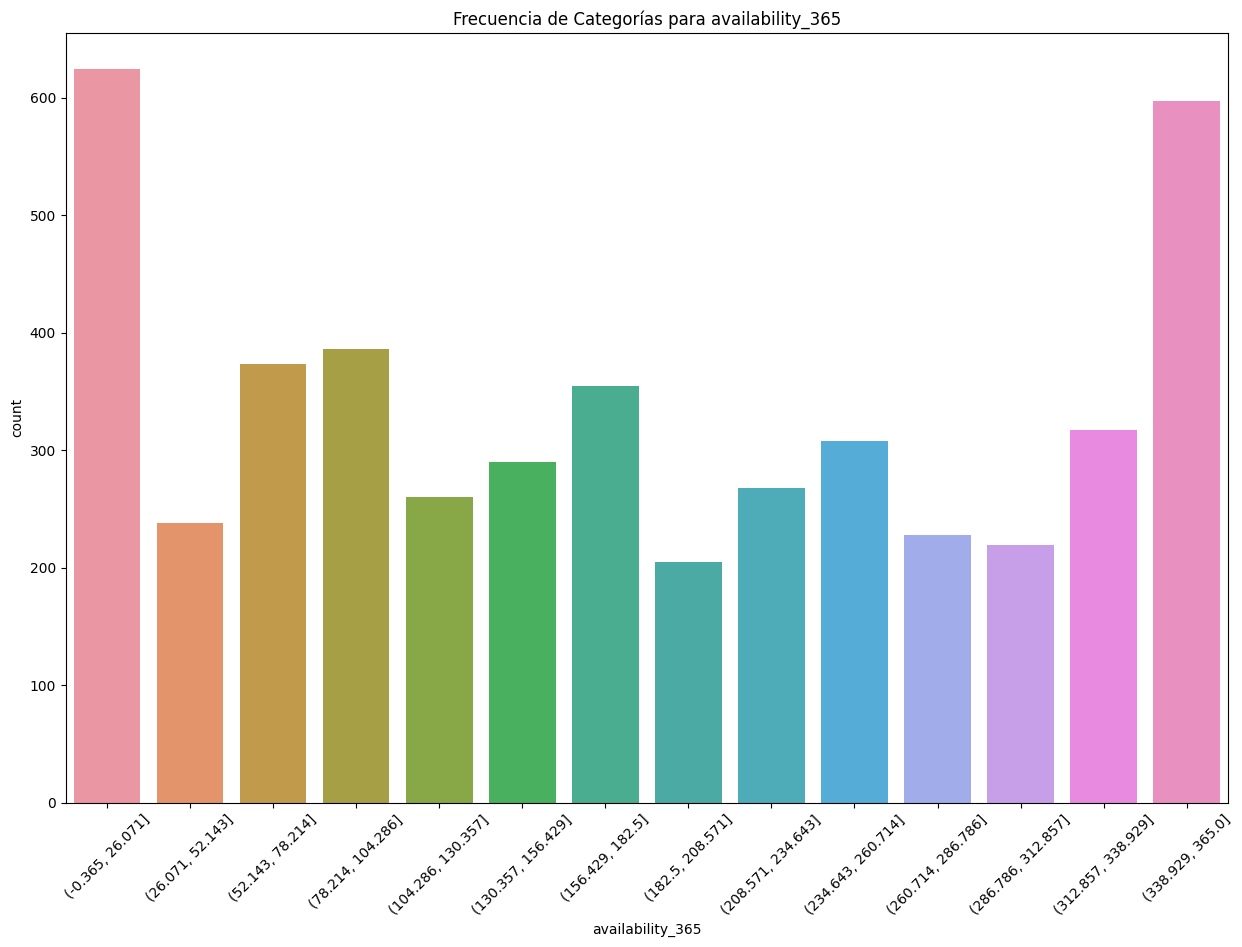

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


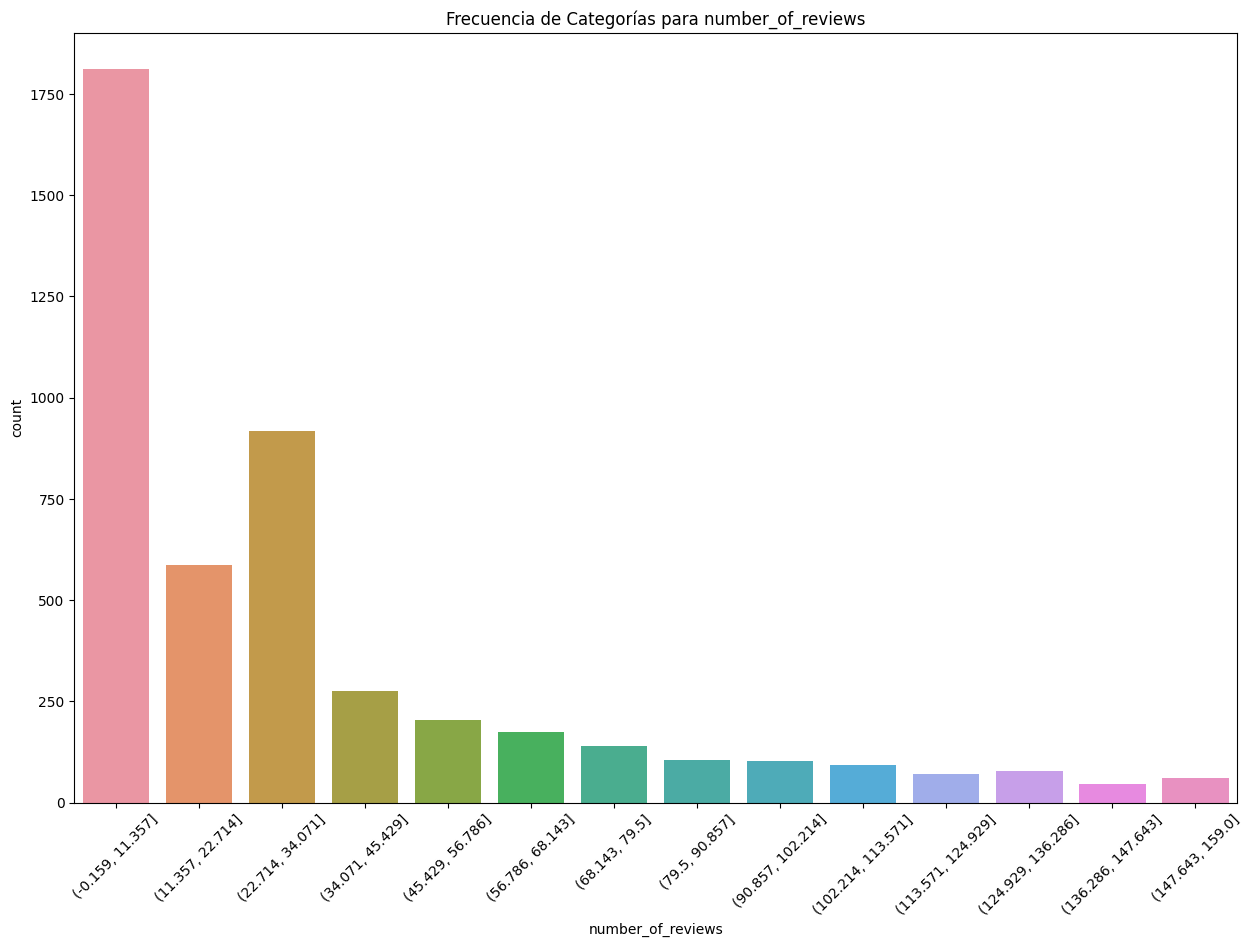

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


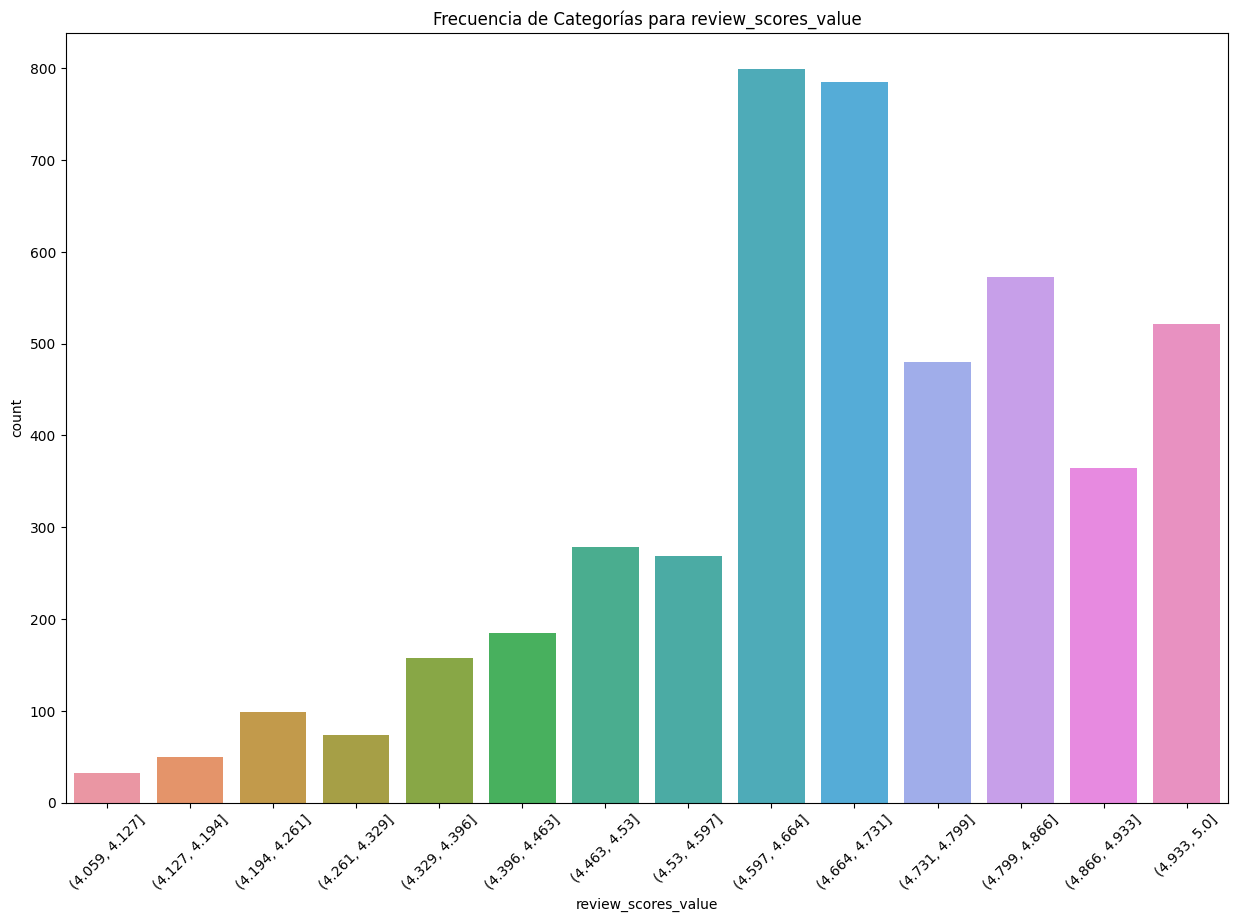

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


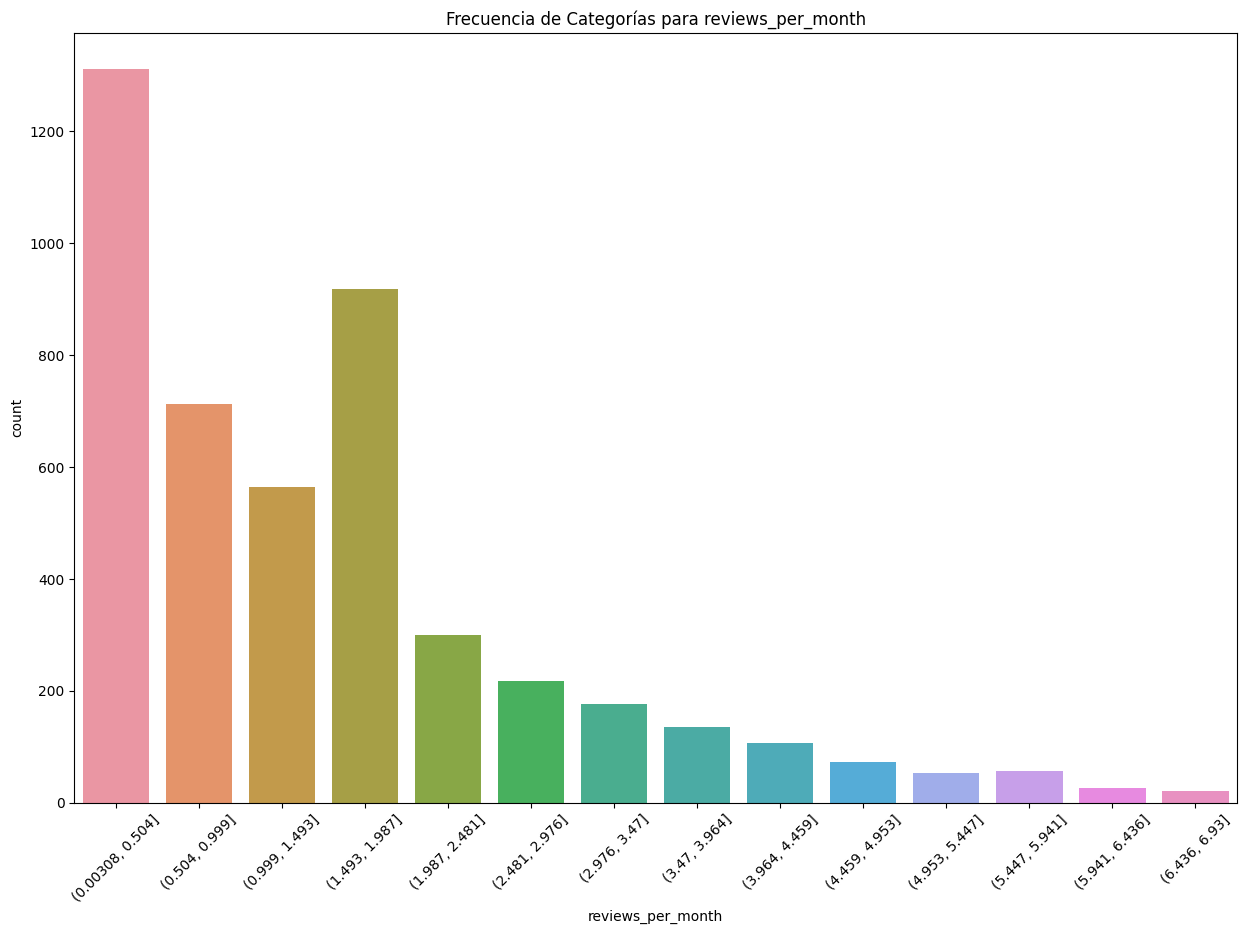

In [41]:
variables_sturges = [
    'host_response_time',
    'host_acceptance_rate',
    'accommodates',
    'bathrooms_text',
    'beds',
    'price',
    'availability_365',
    'number_of_reviews',
    'review_scores_value',
    'reviews_per_month'
]

# Identificar columnas con 'Este_es_un_valor_nulo'
columnas_con_nulos = []
for columna in df.columns:
    if 'Este_es_un_valor_nulo' in df[columna].values:
        columnas_con_nulos.append(columna)


# Reemplazar 'Este_es_un_valor_nulo' con NaN para que la regla de Sturges funcione
for columna in columnas_con_nulos:
    df[columna] = df[columna].replace('Este_es_un_valor_nulo', np.nan)

# Categorizacion y gráficas
for variable in variables_sturges:
    if df[variable].dtype == 'object':
        if variable == 'host_response_time':
            df['host_response_time_cat'] = pd.Categorical(df['host_response_time'])
            plot_category_frequencies(df['host_response_time_cat'], variable)
        elif variable == 'host_acceptance_rate':
            df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
            categories = categorize_variable(df, variable)
            plot_category_frequencies(categories, variable)
        elif variable == 'bathrooms_text':
            df['bathrooms_text_cat'] = pd.Categorical(df['bathrooms_text'])
            plot_category_frequencies(df['bathrooms_text_cat'], variable)
        elif variable == 'price':
            df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
            categories = categorize_variable(df, variable)
            plot_category_frequencies(categories, variable)
        else:
            print(f"No se puede categorizar esta variable '{variable}' automáticamente.")
    else:
        categories = categorize_variable(df, variable)
        plot_category_frequencies(categories, variable)